# Census Income Project

In [1]:
from IPython.display import Image
Image(url= "https://miro.medium.com/max/700/1*wTWeAaUQv-lms51JmSTWDA.jpeg")

# 1.Introduction

#### Census money income is defined as income received on a regular basis (exclusive of certain money receipts such as capital gains) before payments for personal income taxes, social security, union dues, medicare deductions, etc.
#### Countless decisions in private and public sectors are based on Census data. Census data is the backbone of the democratic system of government, highly affecting the economic sectors. Census-related figures are used to distribute the federal funding by the government into different states and localities.
#### Not only the above, the census data is also used for post census population estimates and projections, economic and social science research, and many other such applications. Hence, the importance of this data and its correct predictions is very clear to us.
#### Data has always been the backbone of many important decisions. When an assumption is backed up by facts and numbers, the chances of incorrectness and bad decisions decrease.

# 2. Problem Statement

#### The above introduction had an aim to increase the awareness about how the income factor actually has an impact not only on the personal lives of people, but also an impact on the nation and its betterment. We will today have a look on the data extracted from the 1994 Census bureau database, and try to find insights about how different features have an impact on the income of an individual. Though the data is quite old, and the insights drawn cannot be directly used for derivation in the modern world, but it would surely help us to analyze what role different features play in predicting the income of an individual.

# 3.What Methods I wiil going to solve ?

### Income Prediction Methodology:
###### Loading The Dataset
###### Feature Selection Method Using Info Gain Of Features.
###### Train Model on Training Dataset
###### Test the model on Testing Dataset
###### Result Analysis
### MACHINE LEARNING METHODS:
###### Six machine learning classification models have been used for prediction of Attrition Prediction:
###### Decision Trees
###### KNN - Kneighbors Classifier
###### AdaBoostClassifier
###### RandomForestClassifier
###### LogisticRegression
###### XGBClassifier.

# 4.The Dataset

### The dataset provided to us contains 32560 rows, and 14 different independent features. We aim to predict if a person earns more than 50k per year or not. 
### Since the data predicts 2 values (>50K or <=50K), this clearly is a classification problem, and we will train the classification models to predict the desired outputs.
### Mentioned below are the details of the features provided to us, which we will be feeding to our classification model to train it.
##### 1. Age — The age of an individual, this ranges from 17 to 90.
##### 2. Workclass — The class of work to which an individual belongs.
##### 3. Fnlwgt — The weight assigned to the combination of features (an estimate of how many people belong to this set of combination)
##### 4. Education — Highest level of education
##### 5. Education_num — Number of years for which education was taken
##### 6. Marital_Status — Represents the category assigned on the basis of marriage status of a person
##### 7. Occupation — Profession of a person
##### 8. Relationship — Relation of the person in his family
##### 9. Race — Origin background of a person
##### 10. Sex — Gender of a person
##### 11. Capital_gain — Capital gained by a person
##### 12. Capital_loss — Loss of capital for a person
##### 13. Hours_per_week — Number of hours for which an individual works per week
##### 14. Native_Country — Country to which a person belongs
### Output:
##### 1. Income — The target variable, which predicts if the income is higher or lower than 50K$.

# 5.Importing All Necessary libraries

In [2]:
# IMPORTS LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# preprocession, normalizing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn import metrics

# for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


##### By Importing above All Necessary Libraries I got the idea of implementing all the Libraries in one go for better model Prediction in this dataset.

# 6.Reading the Csv file

In [3]:
# Reading the dataset

df = pd.read_csv('census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


#### Here I am loading the data set into a variable i.e. “df” and processing the first 5 rows.
#### After Reading the csv file I find out that Income are label columns while remaning are the Features columns.

# 7.EDA - Exploratory Data Analysis

#### In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.
#### EDA which focuses more narrowly on checking assumptions required for model fitting and hypothesis testing, and handling missing values and making transformations of variables as needed.

In [4]:
df.shape

(32560, 15)

#### By using shape I got 32560 rows and 15 columns.

In [5]:
# pd.set_option('display.max_rows',None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Also, most of the column are object and few columns are int64 data type.

In [6]:
df.drop_duplicates(inplace = True)

In [7]:
df.shape

(32536, 15)

#### From the above code I can analayze there were duplicates which has been removed from this dataset.

In [8]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

#### By finding (df.unique()) it distinguish the difference between continious & categorical columns in this dataset.

In [9]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


##### Above statistics data show that their multiple outliers.There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction.¶
##### Also, number of rows in each column are same, means there are no null values in the data set
##### Also, the mean and 50%value of most of the column are same and the STD and mean are having the hugh difference.
##### Most of the column statistics data are near to 0 values that need to be replaced by mean and mode.
##### By checking the difference between the 75% and max value there are outliers in some of the column, I will check it soon.

# 8.Data visualization

##### Data visualization is the process of translating large data sets and metrics into charts, graphs and other visuals. The resulting visual representation of data makes it easier to identify and share real-time trends, outliers, and new insights about the information represented in the data.Data visualization gives us a clear idea of what the information means by giving it visual context through maps or graphs. This makes the data more natural for the human mind to comprehend and therefore makes it easier to identify trends, patterns, and outliers within large data sets.¶

##### According to my perception I have done below Data visualization in this Project.

### PiePlot
##### A pie plot is a proportional representation of the numerical data in a column. This function wraps matplotlib. ... pie() for the specified column. If no column reference is passed and subplots=True a pie plot is drawn for each numerical column independently.¶

### Line Plot
##### A line plot is a linear graph that shows data frequencies along a number line. It can be used to analyze data that has a single defined value.

### Pair Plot
##### The pairs plot is a grid of scatterplots. showing the bivariate relationships between all pairs of variables in a multivariate dataset. Although the authors of this article (and many other academics and data analysts) regularly. use this graphical display, it is not clear how widely it is used in practice.Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

### Count Plot
##### A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.countplot() method is used to Show the counts of observations in each categorical bin using bars. Syntax : seaborn.countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, kwargs)A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot(), so you can compare counts across nested variables.

### Histogram Plot
##### To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable.The bins (intervals) must be adjacent and are often (but not required to be) of equal size. If the bins are of equal size, a rectangle is erected over the bin with height proportional to the frequency—the number of cases in each bin. A histogram may also be normalized to display "relative" frequencies. It then shows the proportion of cases that fall into each of several categories, with the sum of the heights equaling 1.

### Distribution Plot
##### A distribution plot displays a distribution and range of a set of numeric values plotted against a dimension. ... In a distribution chart, ideally, two dimensions and one measure are used. If so, you will get the individual line of range and distribution.


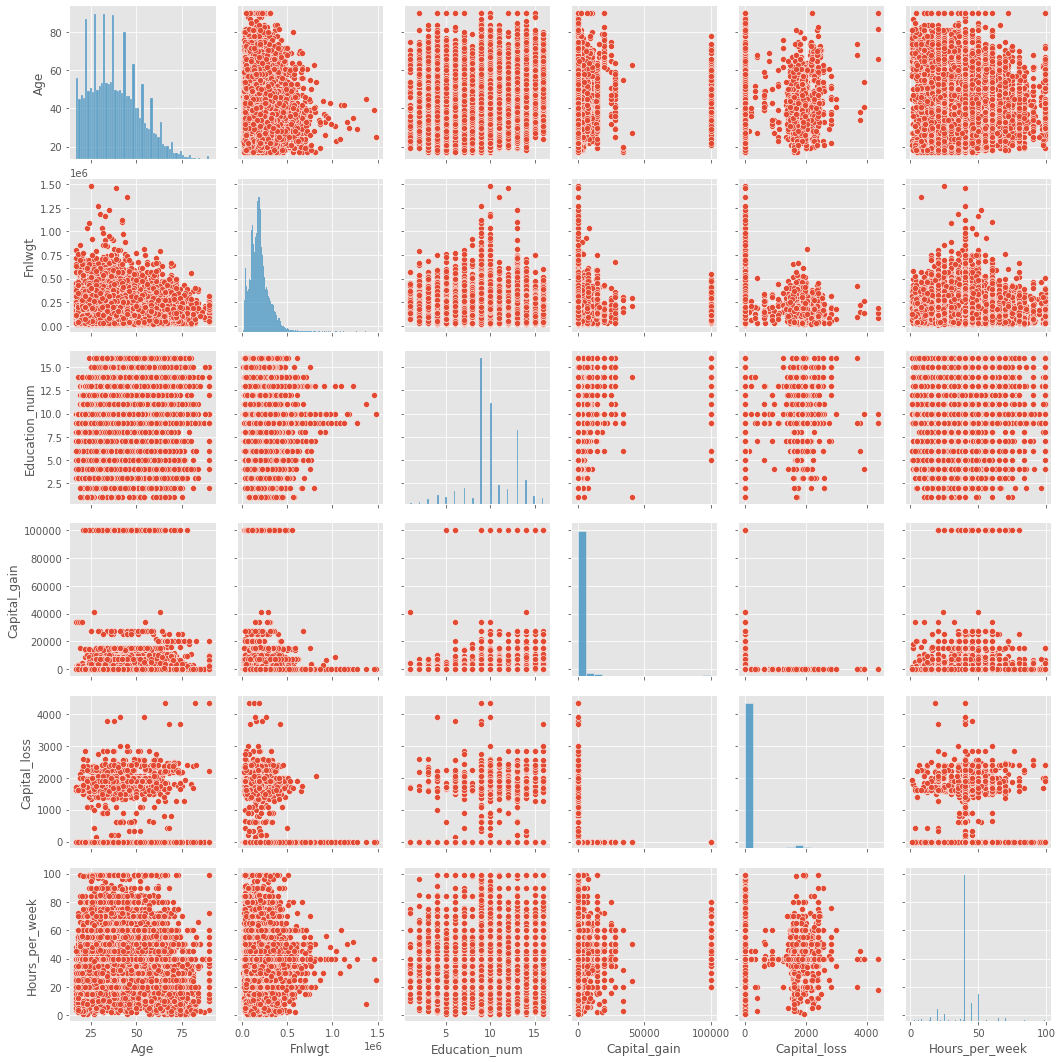

In [58]:
sns.pairplot(df)

#### In this Dataset Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

### Income

In [50]:
df['Income'].value_counts()

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64

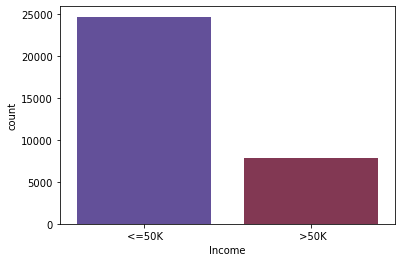

In [51]:
sns.countplot(df['Income'],palette='twilight', data = df);

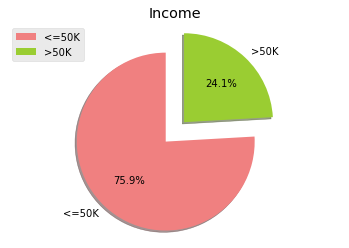

In [52]:
#  pie plot of Income 

labels = ['<=50K', '>50K']
value = [24697, 7839]
colors = ['lightcoral','yellowgreen']
explode = [0.3,0]# 

plt.style.use('ggplot')
plt.title('Income')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

#### From the Above Plots here are 24697 people income is more than 50000 and 7839 people income is below 50000.

#### So we can say that dataset is balanced dataset.

#### Moreover large section of people earing is above 50000 which means people have higher standard of living and country is a developed country.

## Sex

In [59]:
df['Sex'].value_counts()

 Male      21774
 Female    10762
Name: Sex, dtype: int64

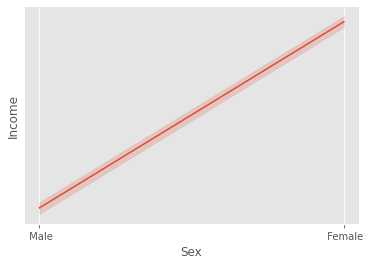

In [65]:
sns.lineplot(x="Sex",y="Income",data=df,markers=True)
plt.show()

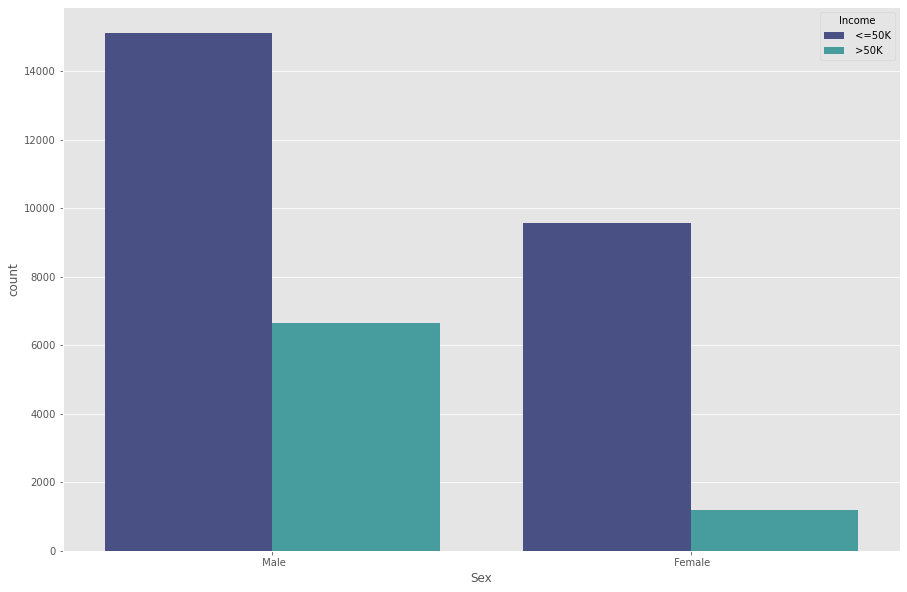

In [68]:
plt.figure(figsize=(15,10))
sns.countplot(df['Sex'], palette = 'mako', hue = 'Income', data = df);

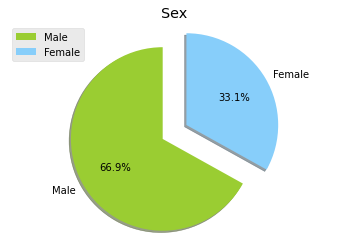

In [14]:
#  pie plot of Sex 

labels = ['Male', 'Female']
value = [21774, 10762]
colors = ['yellowgreen','lightskyblue']
explode = [0.3,0]# 

plt.style.use('ggplot')
plt.title('Sex')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

#### There are 21774 males employed and 10762 females employed in dataset.
#### When it comes to income males have more numbers in terms of earning above $50000 than female.

## Race

In [15]:
df['Race'].value_counts()

 White                 27794
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

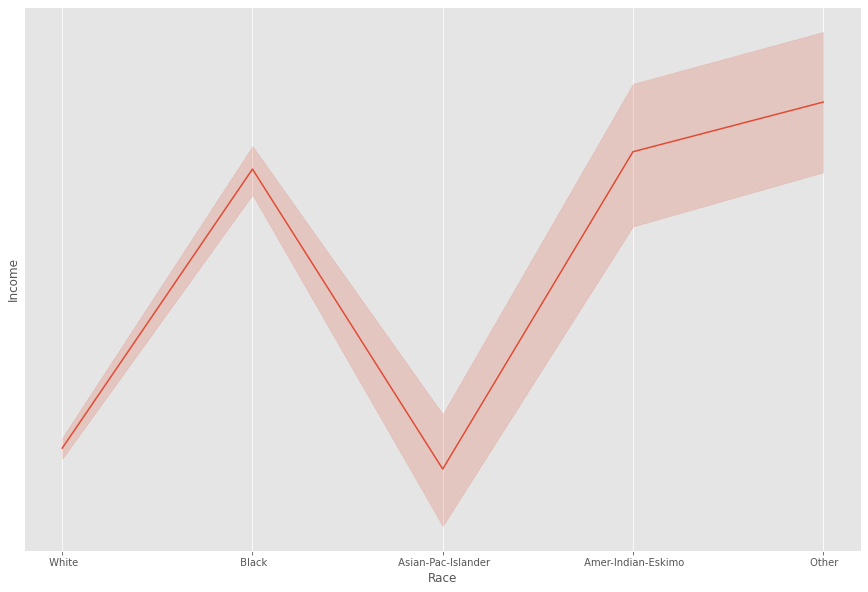

In [73]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Race",y="Income",data=df,markers=True)
plt.show()

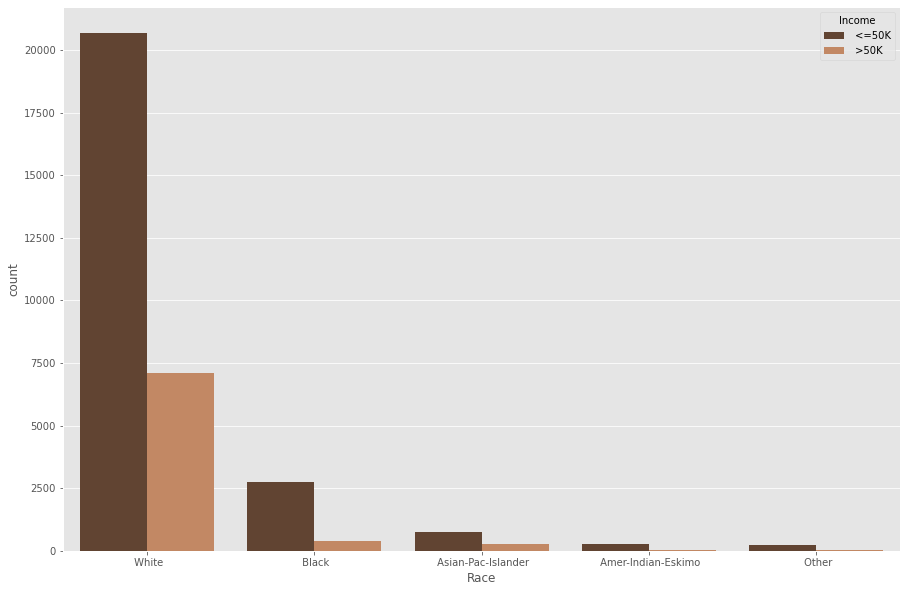

In [69]:
plt.figure(figsize=(15,10))
sns.countplot(df['Race'], palette = 'copper', hue = 'Income', data = df);

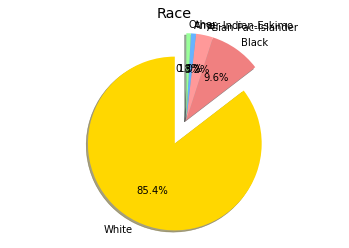

In [17]:
#  pie plot of Race 

labels = ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']
value = [27794, 3122, 1038, 311, 271]
colors = ['gold','lightcoral','#ff9999','#66b3ff','#99ff99']
explode = [0.3,0,0,0,0]# 

plt.style.use('ggplot')
plt.title('Race')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### From the above Plots Might be the while people population is high is USA that why they are securing better and high paid jobs.

### Relationship

In [18]:
df['Relationship'].value_counts()

 Husband           13187
 Not-in-family      8291
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

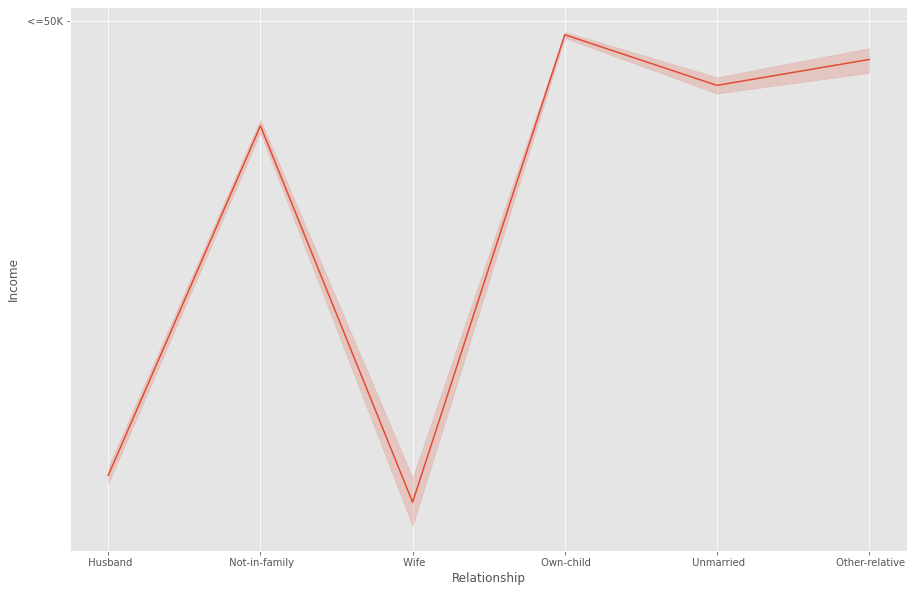

In [74]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Relationship",y="Income",data=df,markers=True)
plt.show()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Husband'),
  Text(1, 0, ' Not-in-family'),
  Text(2, 0, ' Wife'),
  Text(3, 0, ' Own-child'),
  Text(4, 0, ' Unmarried'),
  Text(5, 0, ' Other-relative')])

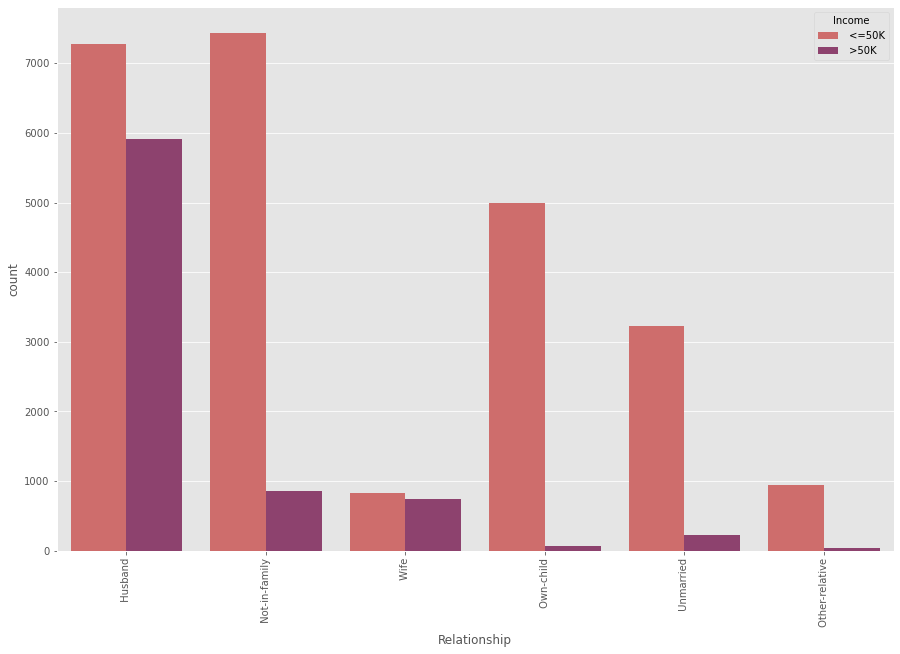

In [75]:
plt.figure(figsize=(15,10))
sns.countplot(df['Relationship'],palette='flare',hue='Income',data=df);
plt.xticks(rotation=90)

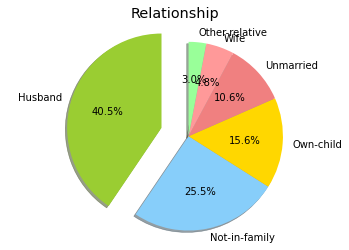

In [20]:
#  pie plot of Relationship 

labels = ['Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Wife', 'Other-relative']
value = [13187, 8291, 5064, 3445, 1568, 981]
colors = ['yellowgreen','lightskyblue','gold','lightcoral','#ff9999','#99ff99']
explode = [0.3,0,0,0,0,0]# 

plt.style.use('ggplot')
plt.title('Relationship')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### The above plots gives me the clear idea that those people who don't have family there earning is above 50000..

#### This can give me an idea that bachelors are more career oriented.
#### They have less distraction so they imporove there skill to get better high paid jobs.

### Occupation

In [76]:
df['Occupation'].value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64

In [77]:
# repalcing the values with mode
df['Occupation'] = df['Occupation'].str.replace('?','Prof-specialty')

#### There were '?' in few rows in occupation dataset that was replaced with the help of mode.

In [78]:
df['Occupation'].value_counts()

 Prof-specialty       5979
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64

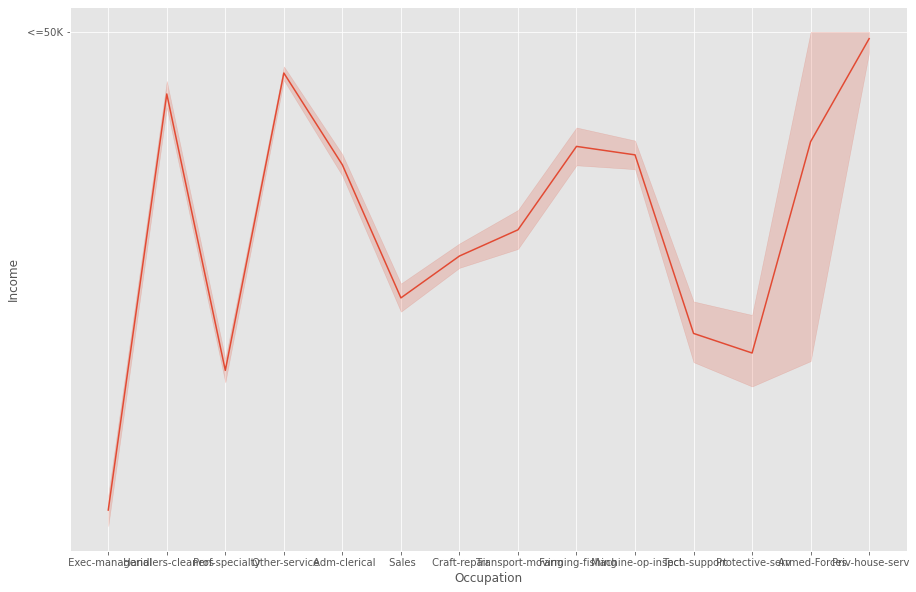

In [82]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Occupation",y="Income",data=df,markers=True)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

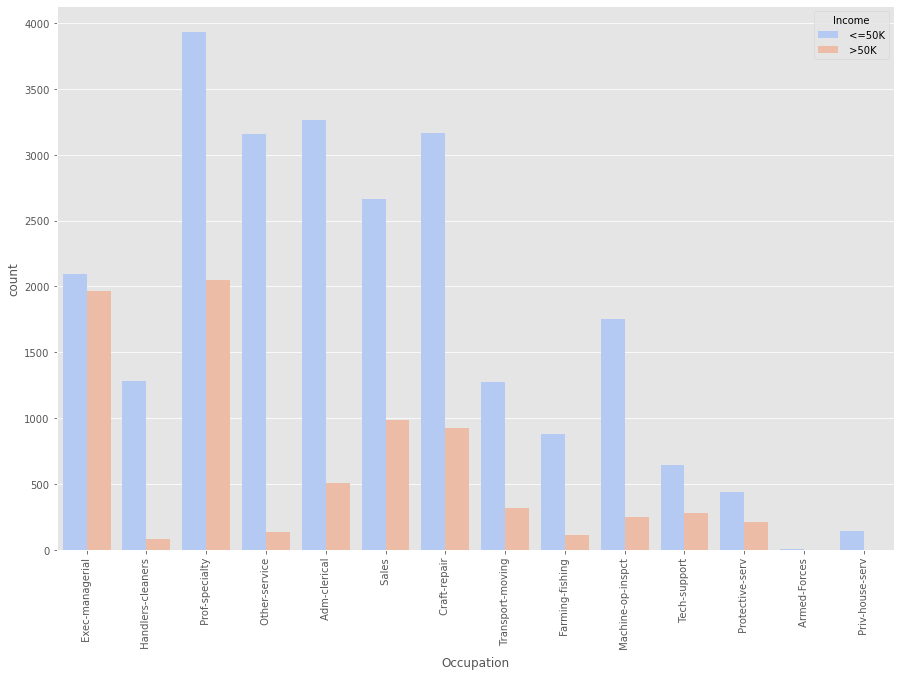

In [79]:
plt.figure(figsize=(15,10))
sns.countplot(df['Occupation'],palette='coolwarm',hue='Income',data=df);
plt.xticks(rotation=90)

#### Occupation play the vital role in determining the income of person.

# Marital_status

In [83]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

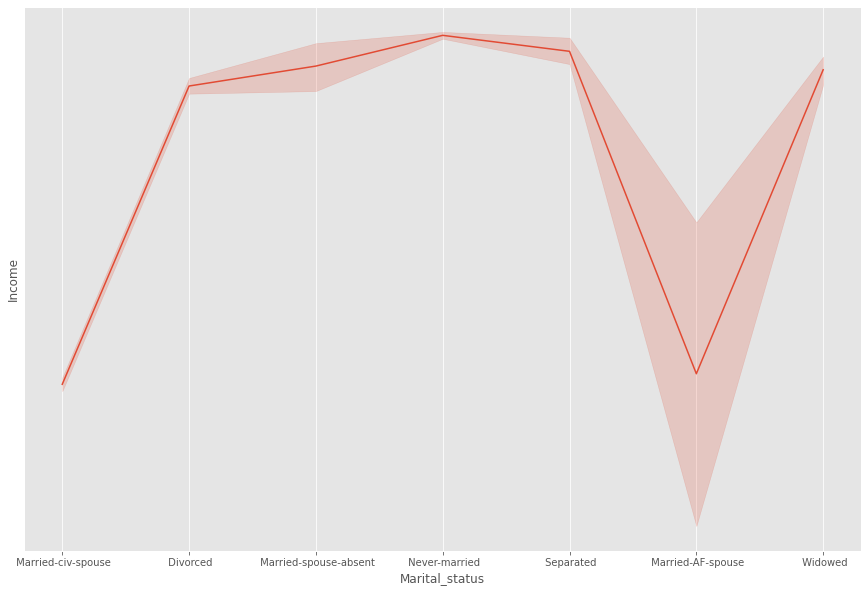

In [84]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Marital_status",y="Income",data=df,markers=True)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

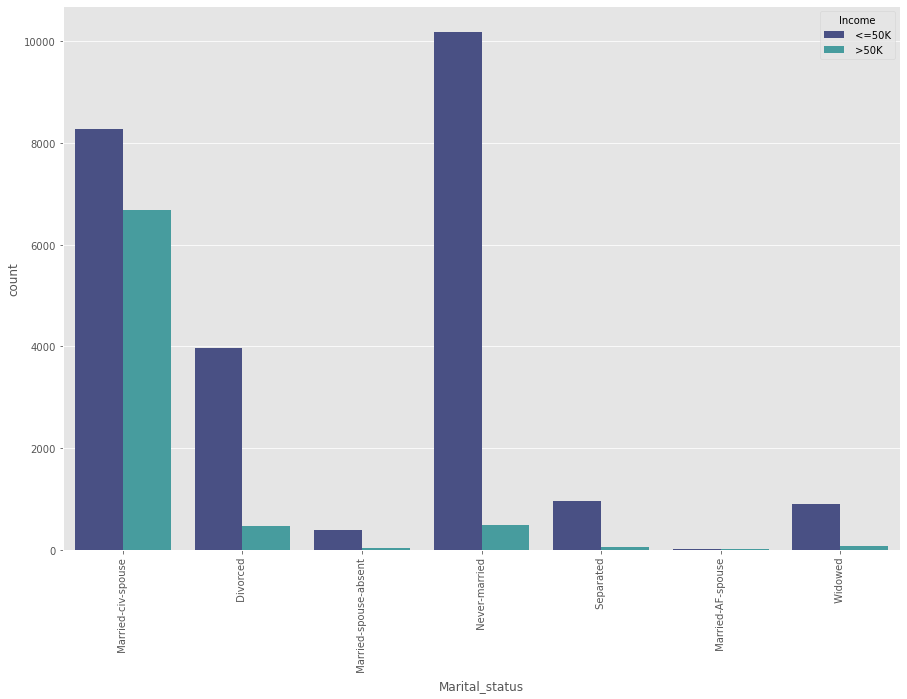

In [85]:
plt.figure(figsize=(15,10))
sns.countplot(df['Marital_status'],palette='mako',hue='Income',data=df);
plt.xticks(rotation=90)

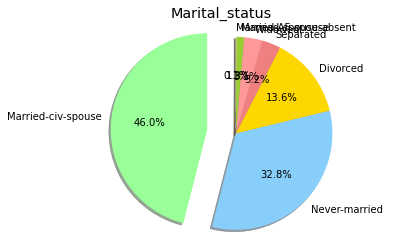

In [27]:
#  pie plot of Marital_status 

labels = ['Married-civ-spouse', 'Never-married', 'Divorced', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse']
value = [14970, 10666, 4441, 1025, 993, 418, 23]
colors = ['#99ff99','lightskyblue','gold','lightcoral','#ff9999','yellowgreen', '#ffcc99']
explode = [0.3,0,0,0,0,0,0]

plt.style.use('ggplot')
plt.title('Marital_status')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### From the above plot I can observe that People who are 'Never-married' are the ones who are earning more than 50K which gives me an idea thar Un-married peoples have Less Responsibility, so they can give more time to their career which Leads them high income.

## Workclass

In [86]:
df['Workclass'].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [87]:
# repalcing the values with mode
df['Workclass'] = df['Workclass'].str.replace('?','Private')

#### From the WorkClass Column ther are few missing ("?") data which is replaced by the Private attribute.

In [88]:
df['Workclass'].value_counts()

 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

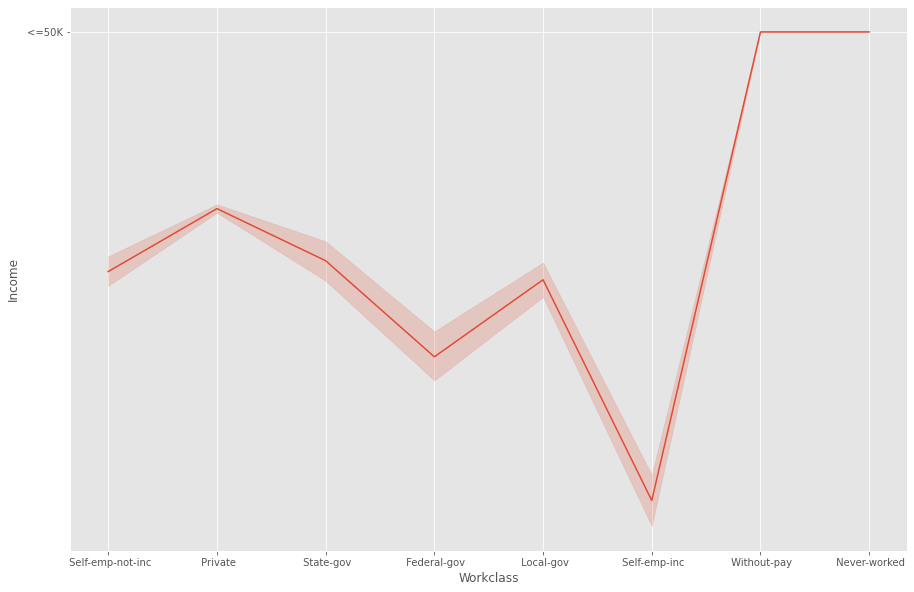

In [89]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Workclass",y="Income",data=df,markers=True)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' Self-emp-inc'),
  Text(6, 0, ' Without-pay'),
  Text(7, 0, ' Never-worked')])

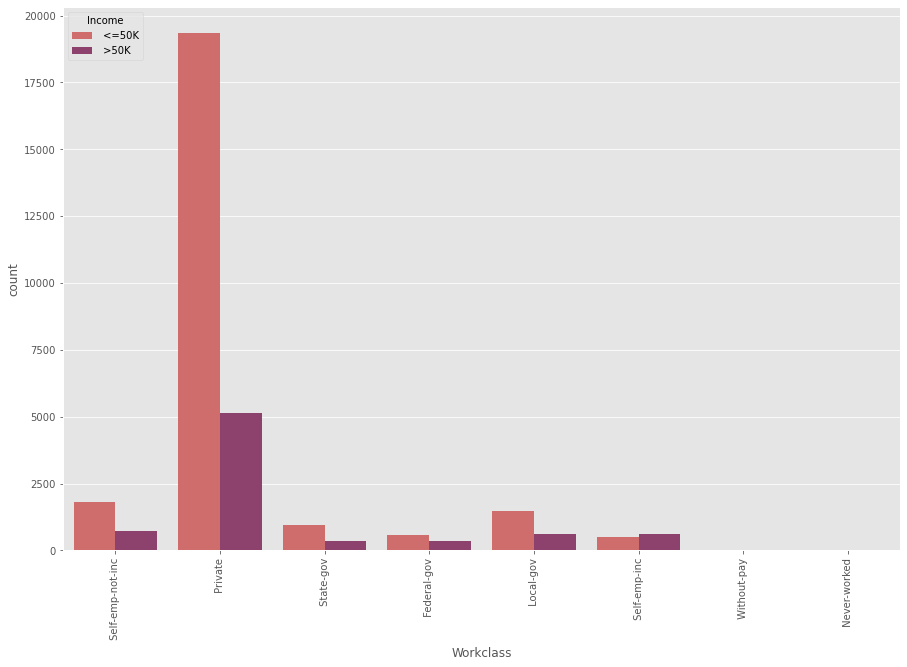

In [90]:
plt.figure(figsize=(15,10))
sns.countplot(df['Workclass'],palette='flare',hue='Income',data=df);
plt.xticks(rotation=90)

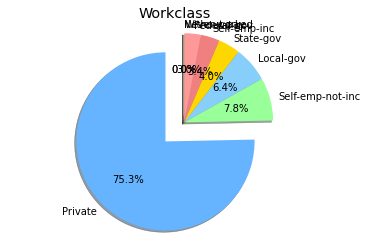

In [32]:
#  pie plot of Workclass 

labels = ['Private', 'Self-emp-not-inc', 'Local-gov', 'State-gov', 'Self-emp-inc', 'Federal-gov', 'Without-pay', 'Never-worked']
value = [24509, 2540, 2093, 1297, 1116, 960, 14, 7]
colors = ['#66b3ff','#99ff99','lightskyblue','gold','lightcoral','#ff9999','yellowgreen', '#ffcc99']
explode = [0.3,0,0,0,0,0,0,0]

plt.style.use('ggplot')
plt.title('Workclass')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### From the above count Plot i can say that People who are working in Private Institutions there income is comparitively higher than other income source. Moreover i can say that People prefer private companies for higher source of income.

# Native_country

In [33]:
df['Native_country'].value_counts()

 United-States                 29152
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [34]:
df['Native_country']=df['Native_country'].str.replace('?','United-States')

In [35]:
df['Native_country'].value_counts()

 United-States                 29734
 Mexico                          639
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

##### From the Native_country Column ther are few missing ("?") data which is replaced by the 'United-States' attribute 

In [22]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Label Encoder

#### Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [10]:
le = LabelEncoder()
df.Workclass = le.fit_transform(df.Workclass)
df.Education = le.fit_transform(df.Education)
df.Marital_status = le.fit_transform(df.Marital_status)
df.Occupation = le.fit_transform(df.Occupation)
df.Relationship = le.fit_transform(df.Relationship)
df.Race = le.fit_transform(df.Race)
df.Sex = le.fit_transform(df.Sex)
df.Native_country = le.fit_transform(df.Native_country)
df.Income = le.fit_transform(df.Income)

In [11]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


In [12]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32536.000000,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,3.868638,1.897843e+05,10.297547,10.081725,2.611384,6.573027,1.446552,3.665816,0.669228,1078.410069,87.370912,40.440343,36.721508,0.240933
std,13.638193,1.456363,1.055563e+05,3.870195,2.571622,1.506304,4.229473,1.607087,0.848858,0.470498,7388.068465,403.107737,12.347079,7.820842,0.427656
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.369932e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


#### From the Above statistics data show that their multiple outliers mostly in many columns.
#### There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction.
#### a) Also, number of rows in each column are not same, means there is no null values present in the data set.
#### b) Also, the mean and 50%value of most of the column are same and the STD and mean have a major difference to each other.
#### c) Most of the column statistics data are near to 0 values.
#### d) By checking the difference between the 75% and max value there are outliers in some of the column, I will check it soon.

# Distribution Plot

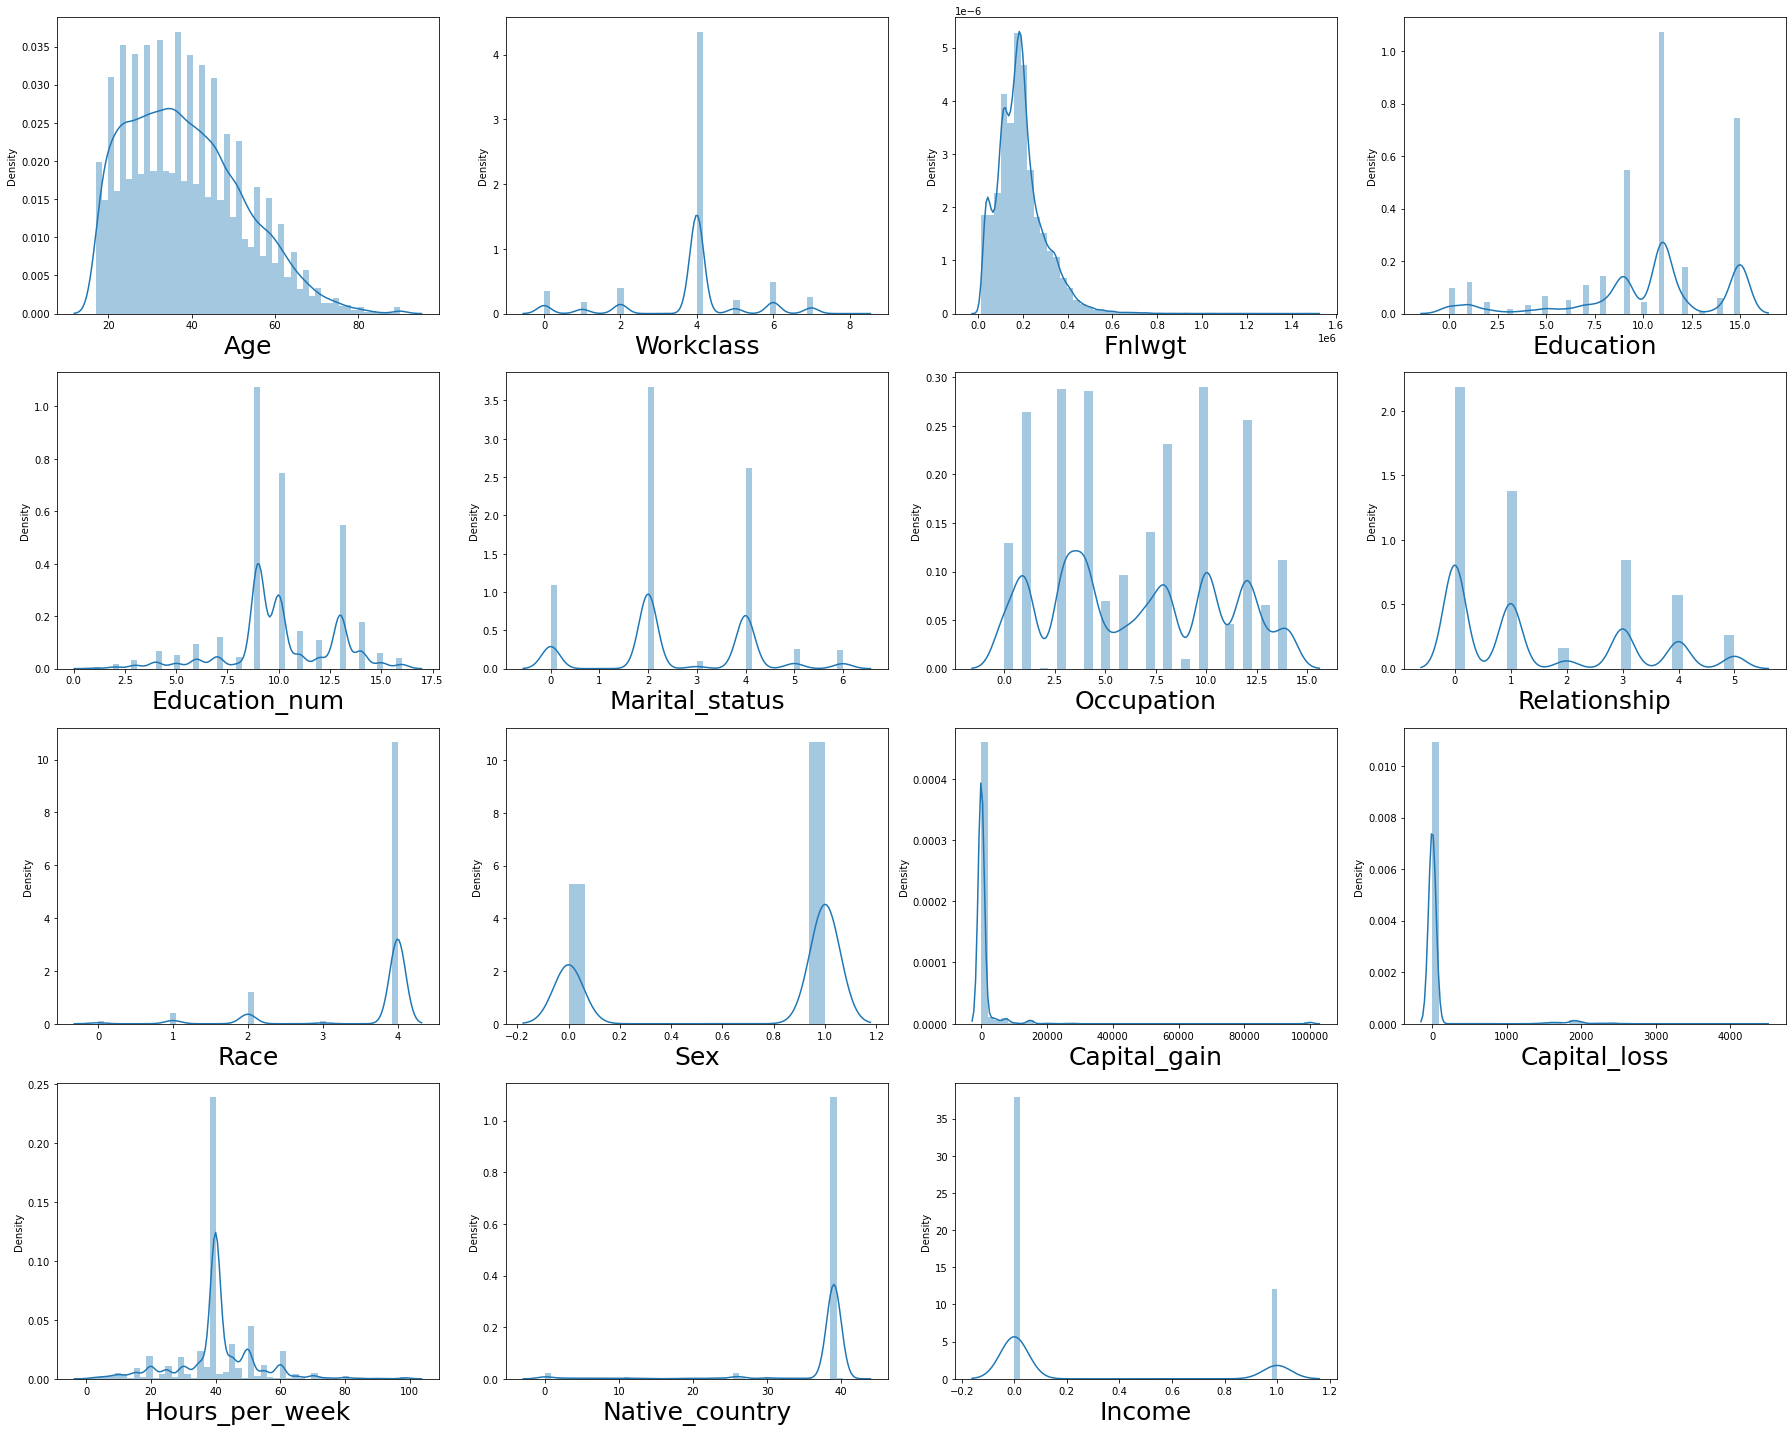

In [13]:
# using the the distribution plot 

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=15:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

#### From the above Distribution Plot I can see that there are skewness in this dataset.

# Histogram Plot

#### Histograms group the data in bins and is the fastest way to get idea about the distribution of each attribute in dataset.
#### THe following are some of the characteristics of histograms:
#### a)provides us a count of the number of observations in each bin created for visualization.¶
#### b)From the shape of the bin, I can easily observe the distribution i.e. Incone  it is Gaussian, skewed or exponential.
#### Histograms also help us to see possible outliers.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Workclass'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>],
       [<AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Education_num'}>,
        <AxesSubplot:title={'center':'Marital_status'}>],
       [<AxesSubplot:title={'center':'Occupation'}>,
        <AxesSubplot:title={'center':'Relationship'}>,
        <AxesSubplot:title={'center':'Race'}>],
       [<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Capital_gain'}>,
        <AxesSubplot:title={'center':'Capital_loss'}>],
       [<AxesSubplot:title={'center':'Hours_per_week'}>,
        <AxesSubplot:title={'center':'Native_country'}>,
        <AxesSubplot:title={'center':'Income'}>]], dtype=object)

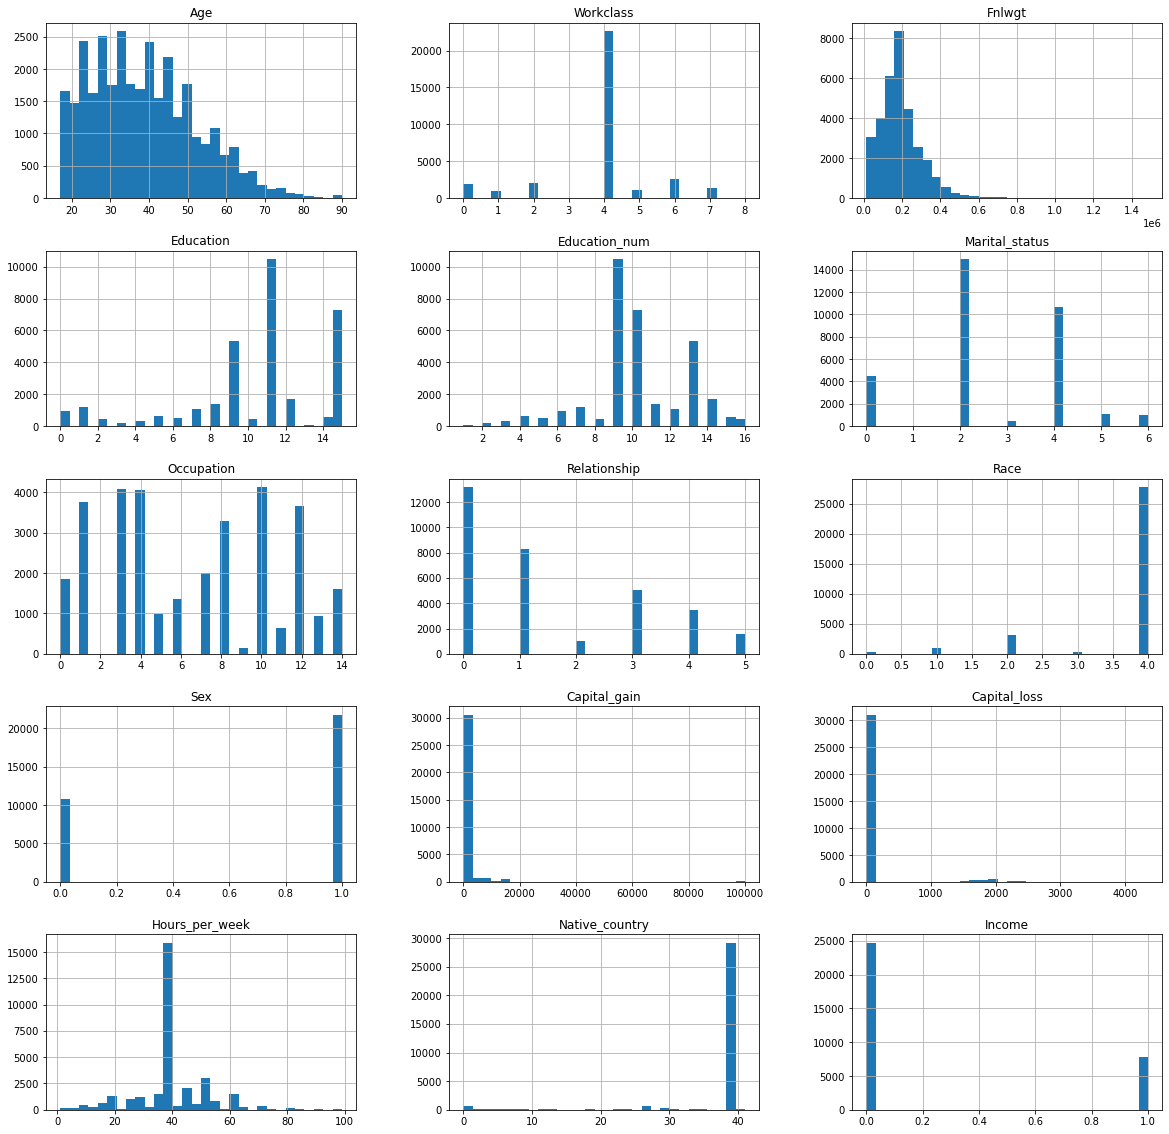

In [14]:
df.hist(figsize=(20,20),grid=True,layout=(5,3),bins=30)

### By making Histogram Plot I can see there are some skewness in this dataset.
### From plotting this histogram, I used the bin size as 30, we can take any bin size (suited as per as data).

# Replacing all the zero values from different columns

In [15]:
# Replacing categorial columns with mode
df['Workclass']=df['Workclass'].replace(0,df['Workclass'].mode()[0])
df['Education']=df['Education'].replace(0,df['Education'].mode()[0])
df['Marital_status']=df['Marital_status'].replace(0,df['Marital_status'].mode()[0])
df['Occupation']=df['Occupation'].replace(0,df['Occupation'].mode()[0])
df['Relationship']=df['Relationship'].replace(0,df['Relationship'].mode()[0])
df['Race']=df['Race'].replace(0,df['Race'].mode()[0])
df['Native_country']=df['Native_country'].replace(0,df['Native_country'].mode()[0])
df['Income']=df['Income'].replace(0,df['Income'].mode()[0])

#### After understanding the Describe I got that in this dataset there are zero values which I have replace with mean because all the zero value column are continuous in nature.

# Box Plot

Age                   AxesSubplot(0.125,0.71587;0.168478x0.16413)
Workclass          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Fnlwgt             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Education          AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Education_num        AxesSubplot(0.125,0.518913;0.168478x0.16413)
Marital_status    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Occupation        AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Relationship      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Race                 AxesSubplot(0.125,0.321957;0.168478x0.16413)
Sex               AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Capital_gain      AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Capital_loss      AxesSubplot(0.731522,0.321957;0.168478x0.16413)
Hours_per_week          AxesSubplot(0.125,0.125;0.168478x0.16413)
Native_country       AxesSubplot(0.327174,0.125;0.168478x0.16413)
Income               AxesSubplot(0.529348,0.125;0.168478x0.16413)
dtype: obj

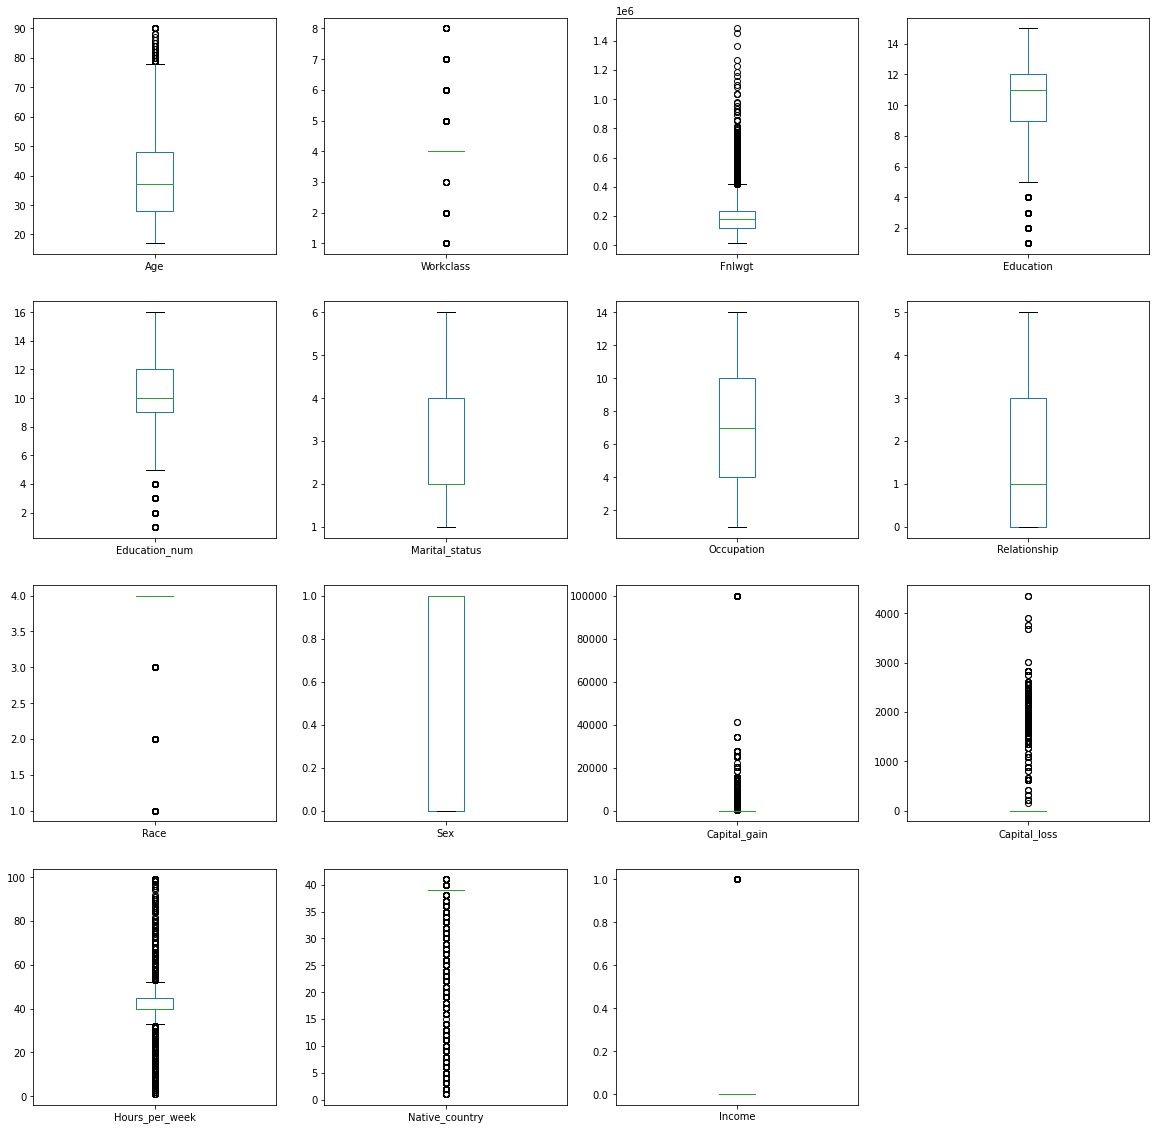

In [16]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,20))

##### From above image I can clear see that there are number of black dots in most of the column which are referring to the outliers, so it means most of the data are outside the distribution.
##### So now I detect the outliers now the second step is to remove the outliers, there are different way to remove the outliers that are zscore values.

# Removing Outliers

# Z score

In [17]:
z_score = zscore(df[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week','Native_country']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,28977.000000,28977.000000,28977.000000,28977.000000,28977.000000,28977.000000,28977.000000,28977.000000,28977.000000,28977.000000,28977.000000,28977.000000,28977.000000,28977.000000,28977.000000
mean,38.155572,4.085240,185024.260034,10.631846,10.035856,2.901163,7.103634,1.476102,3.718742,0.661870,568.677261,1.207199,39.897367,38.422715,0.222107
std,13.384422,1.106296,94787.171746,3.454127,2.492214,1.146456,3.991431,1.608038,0.745633,0.473081,2328.050182,32.563274,11.154422,2.659069,0.415670
min,17.000000,1.000000,12285.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,20.000000,0.000000
25%,27.000000,4.000000,117295.000000,9.000000,9.000000,2.000000,4.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,177482.000000,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,47.000000,4.000000,234190.000000,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,79.000000,8.000000,506436.000000,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,22040.000000,1258.000000,77.000000,41.000000,1.000000


## After Removing Skewness & outliers using Distribution Plot and Histogram plot

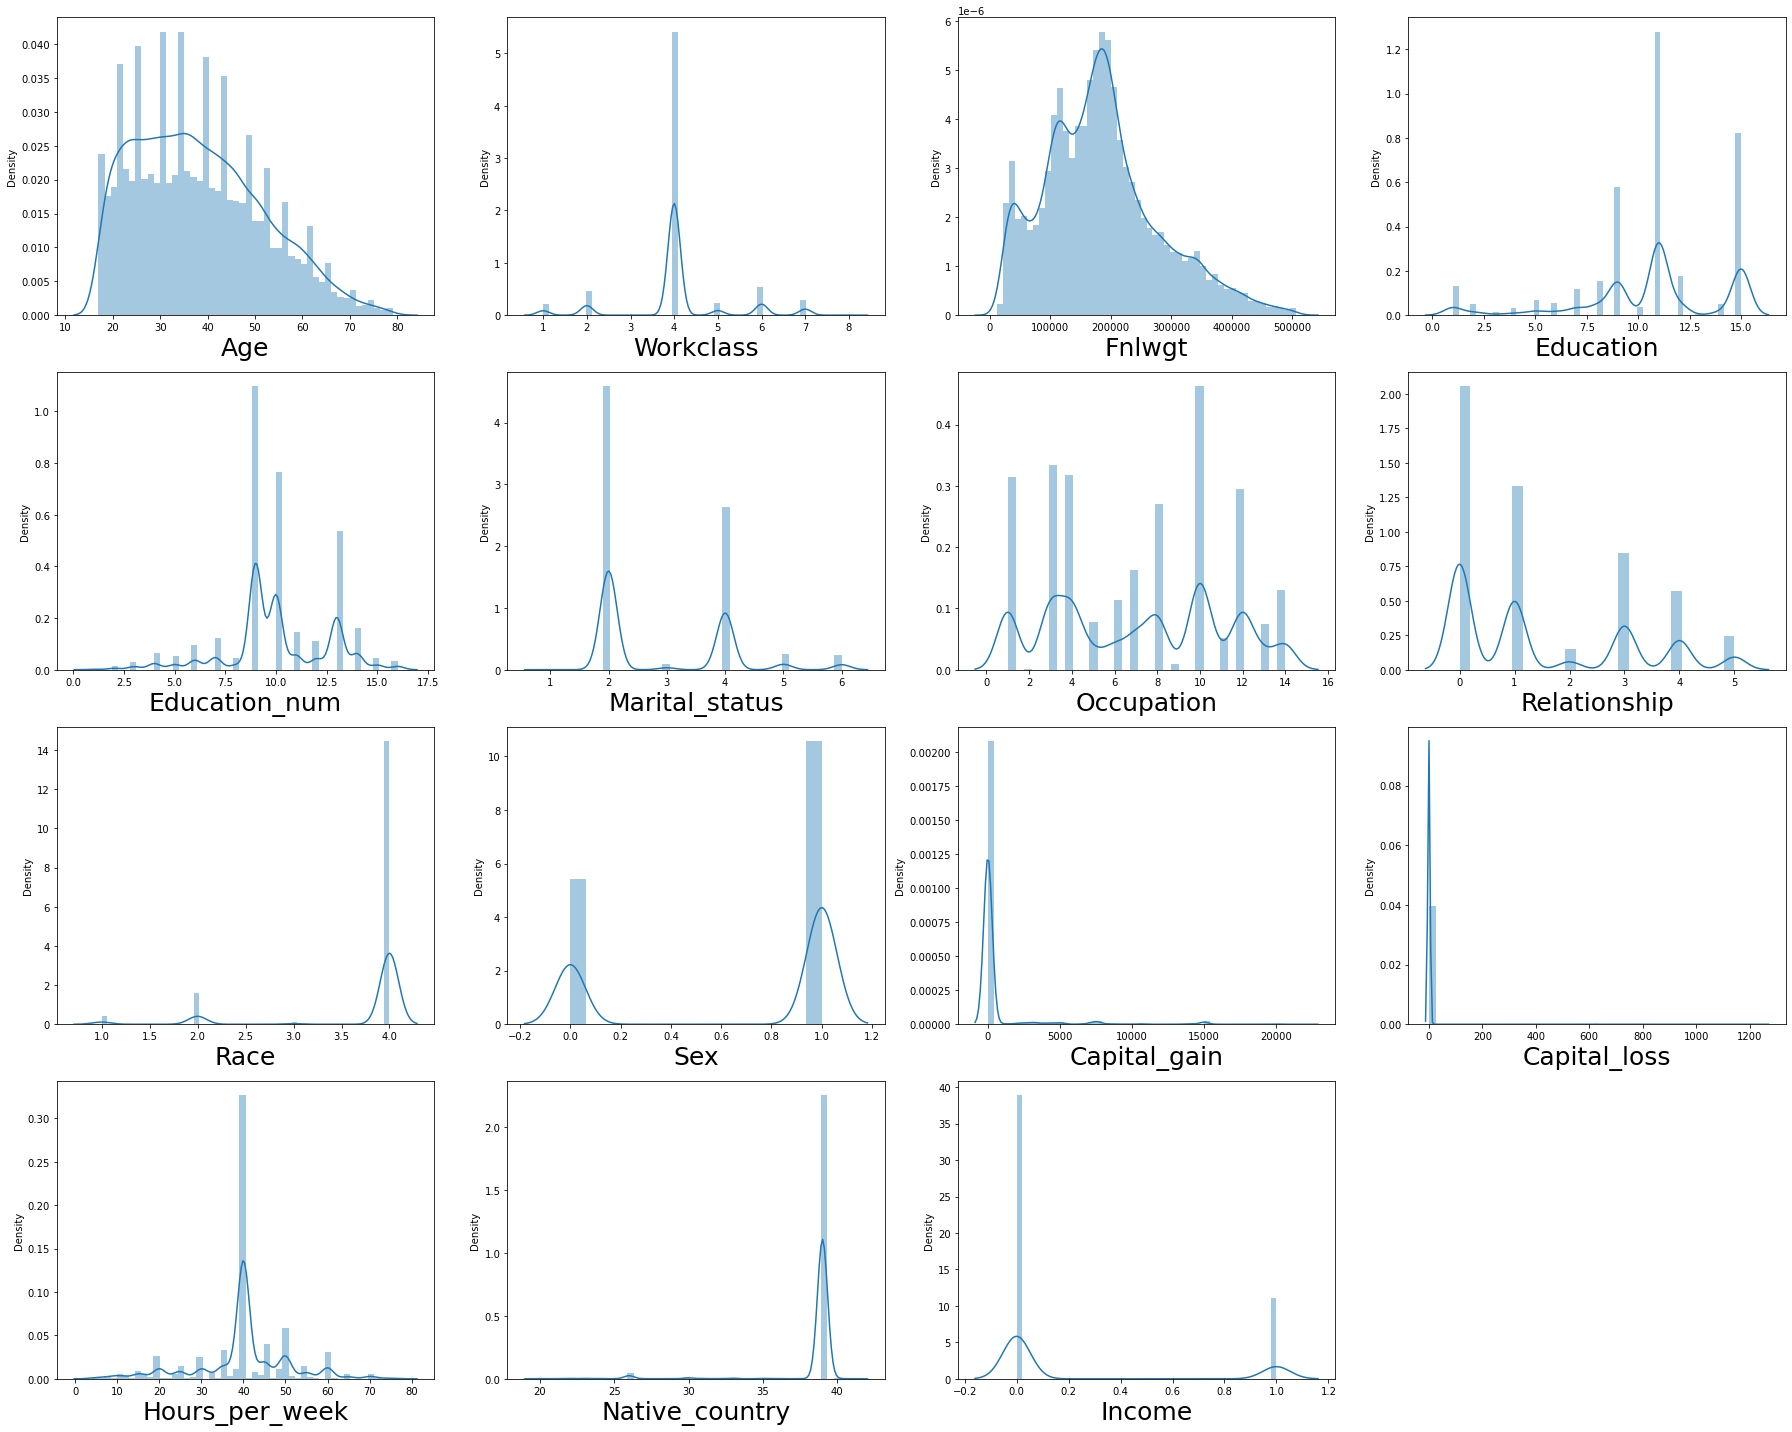

In [18]:
# using the  distribution plot after removing Skewness

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=15:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Workclass'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>],
       [<AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Education_num'}>,
        <AxesSubplot:title={'center':'Marital_status'}>],
       [<AxesSubplot:title={'center':'Occupation'}>,
        <AxesSubplot:title={'center':'Relationship'}>,
        <AxesSubplot:title={'center':'Race'}>],
       [<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Capital_gain'}>,
        <AxesSubplot:title={'center':'Capital_loss'}>],
       [<AxesSubplot:title={'center':'Hours_per_week'}>,
        <AxesSubplot:title={'center':'Native_country'}>,
        <AxesSubplot:title={'center':'Income'}>]], dtype=object)

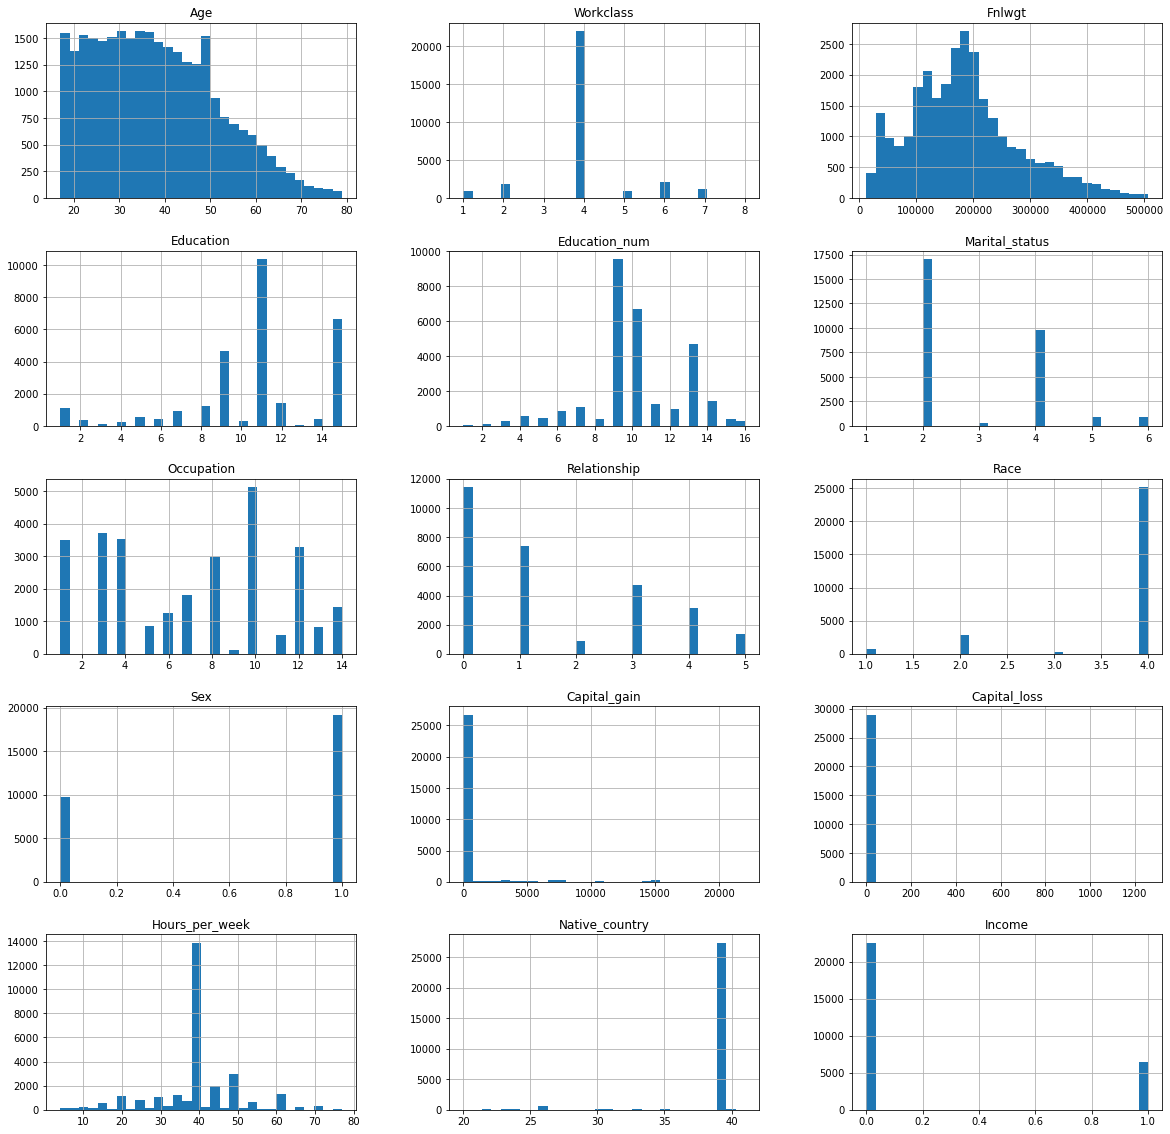

In [19]:
# using the Histogram plot after removing Skewness
df.hist(figsize=(20,20),grid=True,layout=(5,3),bins=30)

In [20]:
df.shape

(28977, 15)

#### After using zscore value then I again check if there are some of the outliers then I will remove it by replacing the outliers with the mean value of that column.
### So, I first find the zscore value and then I decide to make one threshold value as 3 which is standard of industry recommend value and then I remove all the outliers which zscore value is greater than 3.
#### After, removing the outlier’s final there are 28977 and 15 column presents in the data set.
#### Hence After Rmoving Outliers I make distribution plot which shows few outliers are removed.

# Visualize the correlation

In [21]:
# find correlation of features vs target using corrwith

df.drop('Income',axis=1).corrwith(df.Income)

Age               0.238361
Workclass        -0.007700
Fnlwgt           -0.010005
Education         0.042724
Education_num     0.316858
Marital_status   -0.332180
Occupation        0.029850
Relationship     -0.246035
Race              0.072174
Sex               0.209232
Capital_gain      0.343718
Capital_loss     -0.016480
Hours_per_week    0.231655
Native_country    0.042227
dtype: float64

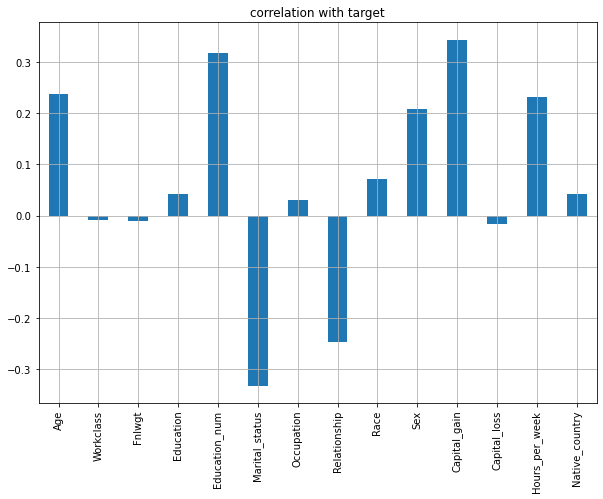

In [22]:
df.drop('Income',axis=1).corrwith(df.Income).plot(kind='bar',grid=True,figsize=(10,7),title="correlation with target")
plt.show()

##### I have checked the relationship between label and different features.¶
##### Most of the features are in positively value only 5 columns are negatively related to target value.

# Correlation

#### Correlation Matrix is basically a covariance matrix. A summary measure called the correlation describes the strength of the linear association. Correlation summarizes the strength and direction of the linear (straight-line) association between two quantitative variables.¶
##### Denoted by r, it takes values between -1 and +1.

In [23]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.031704,-0.074395,-0.020235,0.030309,-0.291268,-0.002027,-0.269293,0.022965,0.089709,0.128518,0.021384,0.090397,0.028679,0.238361
Workclass,0.031704,1.000000,-0.021889,0.005377,-0.002435,-0.038526,0.006010,-0.056181,0.048310,0.068261,0.011789,-0.010340,0.027459,0.003002,-0.007700
Fnlwgt,-0.074395,-0.021889,1.000000,-0.021843,-0.042207,0.027639,-0.002650,0.007376,-0.051034,0.028563,-0.001373,0.002177,-0.015030,-0.100531,-0.010005
Education,-0.020235,0.005377,-0.021843,1.000000,0.248361,-0.016710,-0.040841,0.004375,0.010808,-0.032211,0.011483,-0.003531,0.037211,0.114961,0.042724
Education_num,0.030309,-0.002435,-0.042207,0.248361,1.000000,-0.080834,0.066460,-0.085630,0.033006,0.000975,0.155405,0.008919,0.152131,0.156662,0.316858
Marital_status,-0.291268,-0.038526,0.027639,-0.016710,-0.080834,1.000000,0.018544,0.366044,-0.105149,-0.305518,-0.113762,0.001020,-0.243335,-0.012796,-0.332180
Occupation,-0.002027,0.006010,-0.002650,-0.040841,0.066460,0.018544,1.000000,-0.037981,0.002106,0.050488,0.008558,-0.003259,-0.022227,0.020738,0.029850
Relationship,-0.269293,-0.056181,0.007376,0.004375,-0.085630,0.366044,-0.037981,1.000000,-0.125488,-0.576109,-0.089028,0.028828,-0.258632,-0.007884,-0.246035
Race,0.022965,0.048310,-0.051034,0.010808,0.033006,-0.105149,0.002106,-0.125488,1.000000,0.105491,0.026482,-0.001639,0.050306,0.128548,0.072174
Sex,0.089709,0.068261,0.028563,-0.032211,0.000975,-0.305518,0.050488,-0.576109,0.105491,1.000000,0.069799,-0.028164,0.235528,-0.011996,0.209232


# Heatmap

#### I am using seaborn heatmap to plot the correlated matrix and plot the corr value in the heatmap graph

[]

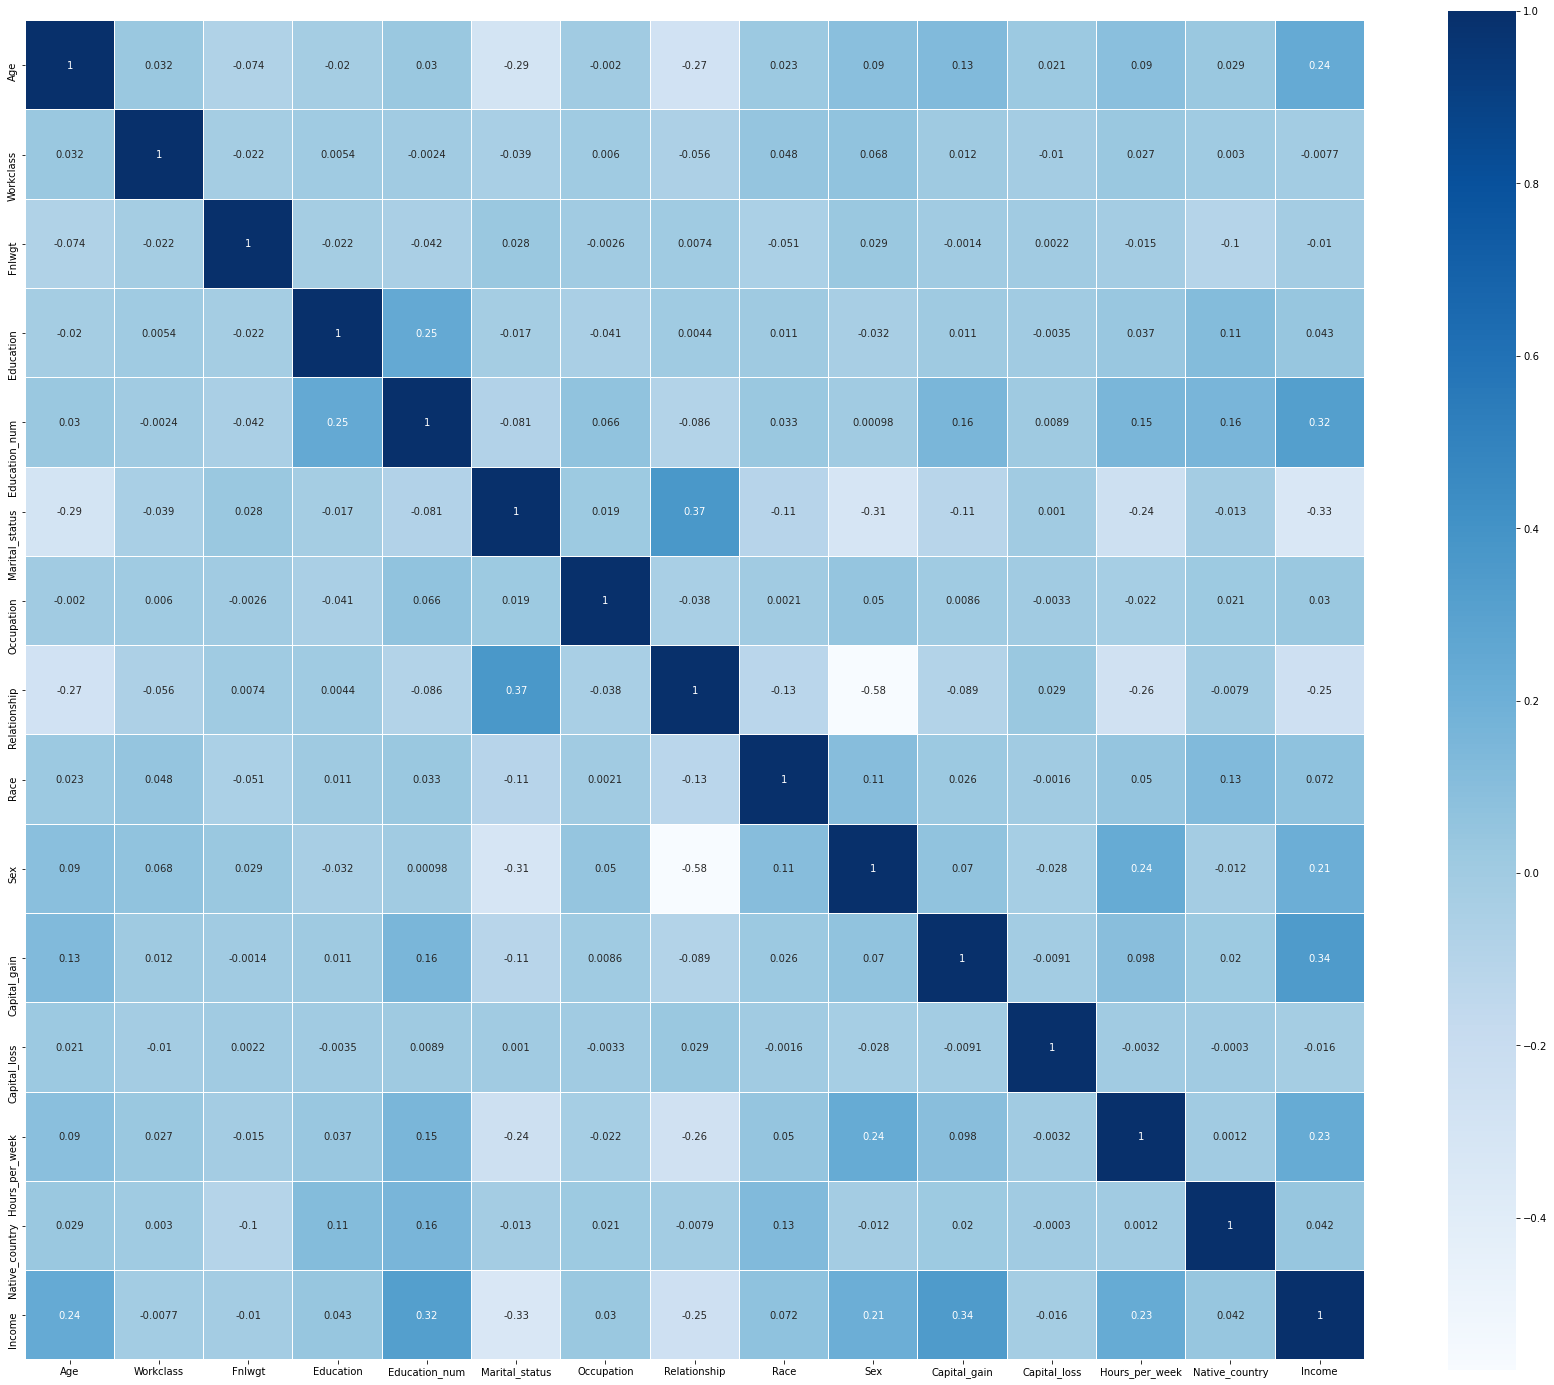

In [24]:
#checking the co-relation of all column to each other
df_cor = df.corr()
plt.figure(figsize=(30,25))
sns.heatmap(df_cor,annot=True,cmap='Blues',linecolor="white",linewidths=0.01,square=True)
plt.plot()

# 9.Machine Learning

In [25]:
# dividing features and label

x = df.drop('Income',axis=1)
y = df.Income

#### Separate response variable and features in x & y.¶

# Scatter Plot

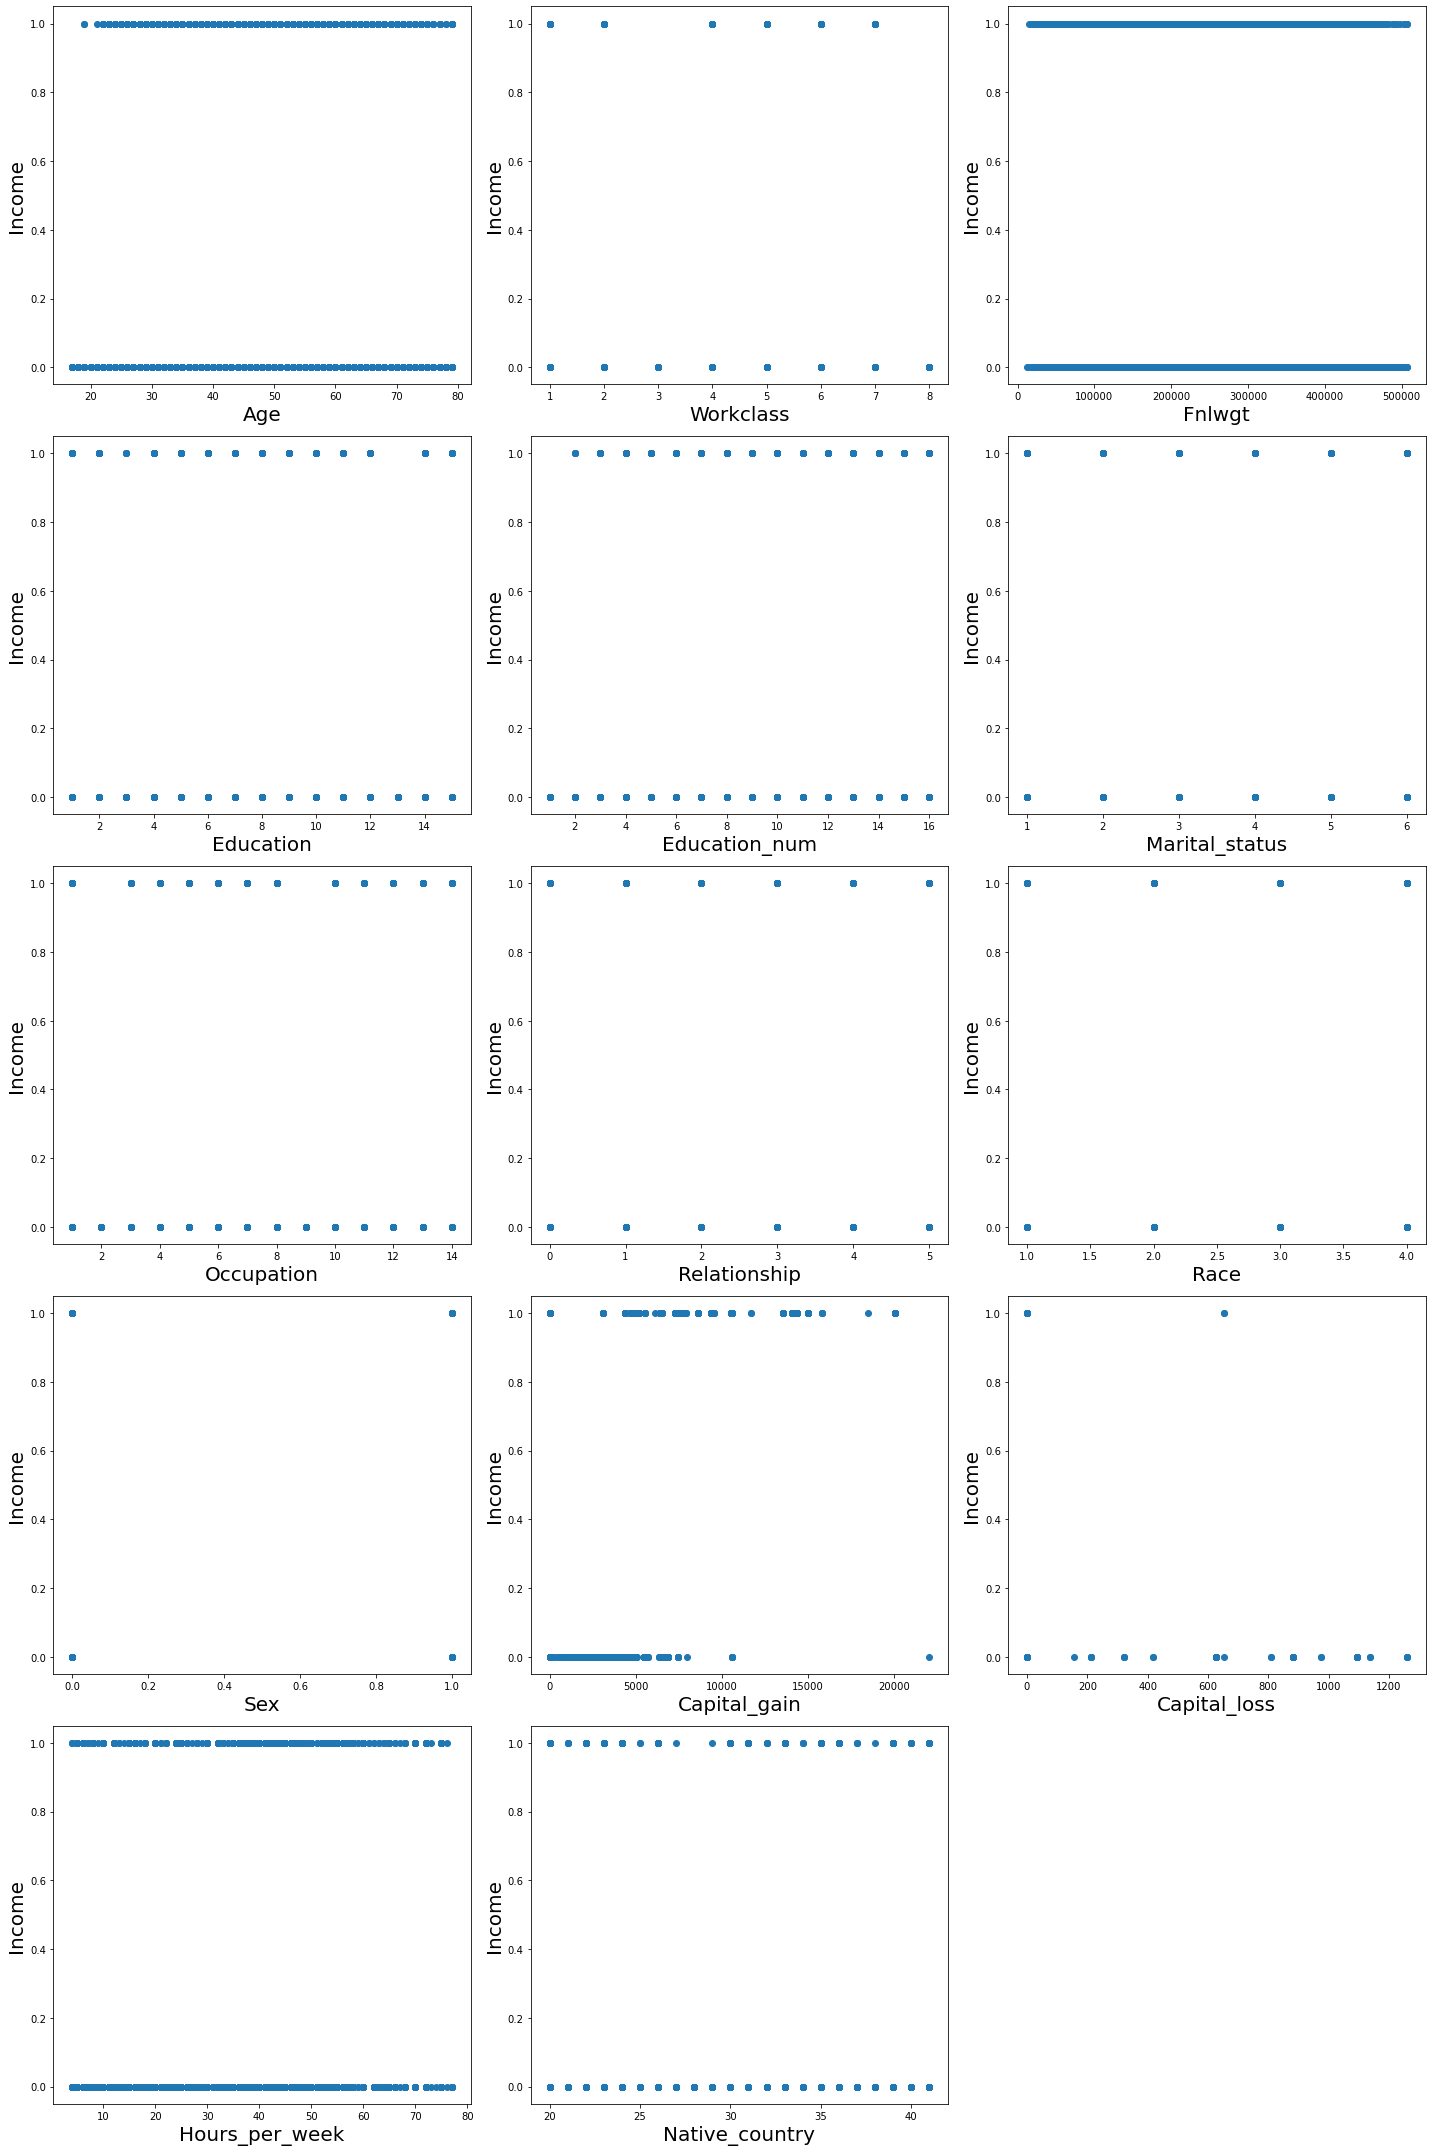

In [26]:
# visualizing the relationship
plt.figure(figsize=(20,30),facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=14:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Income',fontsize=20)
        plotnumber +=1 
        plt.tight_layout()

# StandardScaler

In [27]:
# standard scaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.88495659,  1.73081447, -1.07308841, ..., -0.03707304,
        -2.41140515,  0.21710429],
       [-0.01162354, -0.07705125,  0.32306343, ..., -0.03707304,
         0.00920127,  0.21710429],
       [ 1.10910162, -0.07705125,  0.52430721, ..., -0.03707304,
         0.00920127,  0.21710429],
       ...,
       [ 1.48267667, -0.07705125, -0.34935984, ..., -0.03707304,
         0.00920127,  0.21710429],
       [-1.2070637 , -0.07705125,  0.17371574, ..., -0.03707304,
        -1.78384052,  0.21710429],
       [ 1.03438661,  0.82688161,  1.08563758, ..., -0.03707304,
         0.00920127,  0.21710429]])

#### Applying the standard scaler to scaled the dataset in one range & on x variable.

# VIF - variance inflation factor

##### Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable.

In [28]:
# finding variance inflation factor(vif)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.165347,Age
1,1.007906,Workclass
2,1.019904,Fnlwgt
3,1.079309,Education
4,1.150645,Education_num
5,1.277590,Marital_status
6,1.014275,Occupation
7,1.707313,Relationship
8,1.042680,Race
9,1.574912,Sex


##### According to my concern about vif in this dataset all the values are less than 5 and overall model variance there is no multicollinearity exists.

# Model Building

#### A machine learning model is built by learning and generalizing from training data, then applying that acquired knowledge to new data it has never seen before to make predictions and fulfill its purpose. Lack of data will prevent you from building the model, and access to data isn't enough.
#### So in this dataset while predicting Attrition label , I have used these Algorithmns for Model Building:
#### a)Logistic Regression
#### b)RandomForestClassifier
#### c)Decision Tree Classifier¶
#### d)XGBoost Model
#### e)AdaBoostClassifier
#### f) KNN

# Train Test Split

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = 370)

#### Splitting the dataset into the Training set and Test set.

#### The data should be divided into train and test data.

#### I will use train_test_split feature to divide the data and I will be using testing set of 25% and a training set of 75% of the data.

#### I can set the random state of the split to ensure consistent results.

# Logistic Regression

##### Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regressionis estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1". In the logistic model, the log-odds (the logarithm of the odds) for the value labeled "1" is a linear combination of one or more independent variablesthe independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable.
##### The corresponding probability of the value labeled "1" can vary between 0 (certainly the value "0") and 1 (certainly the value "1"), hence the labeling; the function that converts log-odds to probability is the logistic function, hence the name. The unit of measurement for the log-odds scale is called a logit, from logistic unit, hence the alternative names. Analogous models with a different sigmoid function instead of the logistic function can also be used, such as the probit model; the defining characteristic of the logistic model is that increasing one of the independent variables multiplicatively scales the odds of the given outcome at a constant rate, with each independent variable having its own parameter; for a binary dependent variable this generalizes the odds ratio.¶

In [30]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

##### First I have to fit the Training data of Logistic Regression.

In [31]:
y_pred = log_reg.predict(x_test)

In [32]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[5344,  330],
       [ 837,  734]], dtype=int64)

In [33]:
log_reg.score(x_test,y_test)

0.8389233954451346

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      5674
           1       0.69      0.47      0.56      1571

    accuracy                           0.84      7245
   macro avg       0.78      0.70      0.73      7245
weighted avg       0.83      0.84      0.83      7245



Text(0.5, 1.0, 'Logistic Regression')

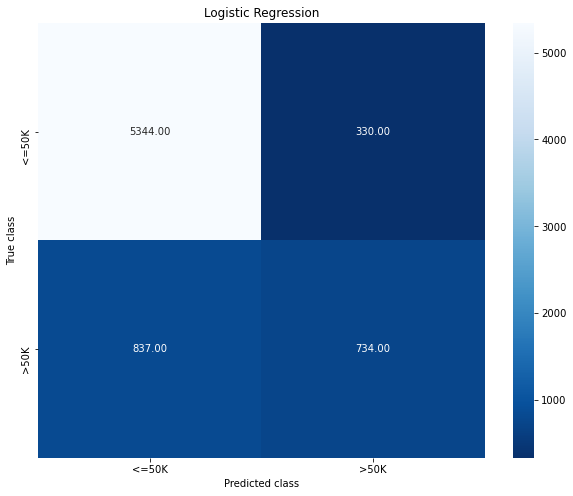

In [35]:
# Finding classification report
print(classification_report(y_test, y_pred))


plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["<=50K", ">50K"] , yticklabels = ["<=50K", ">50K"] ,cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')

#### By using Logistic Regression I Get Accuracy Score : 84%
#### After modelling Logistic Regression then my next step is to find Roc Score which will help me to make Roc_Auc Curve.

#### Below is the Roc Score:

In [36]:
# Logistic Regression AUC score
roc_auc_score(y_test,log_reg.predict(x_test))

0.7045291520368182

### In prediction Logistic Regression with Income:
##### I had done this prediction by taking Income as an output variable which is Classification in nature.
##### While calculating the best random state the 370 is best state which providing the highest accuracy value for this model.
##### After calculating confusion matrix and classification report I used Heat Map of Logistic Regression - 84%
##### Then I found roc_auc_score of Logistic Regression which is 70.45%

# KNN

#### The abbreviation KNN stands for “K-Nearest Neighbour”. It is a supervised machine learning algorithm. The algorithm can be used to solve both classification and regression problem statements. The number of nearest neighbours to a new unknown variable that has to be predicted or classified is denoted by the symbol 'K'.

In [37]:
best_features = SelectKBest(score_func=f_classif,k=12)
fit = best_features.fit(x,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)

# concatenate Dataframe
feature_scores = pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns = ['Features_Name','Score']
print(feature_scores.nlargest(32,'Score'))

     Features_Name        Score
10    Capital_gain  3881.774773
5   Marital_status  3593.749721
4    Education_num  3233.716108
7     Relationship  1866.964279
0              Age  1745.412352
12  Hours_per_week  1643.084478
9              Sex  1326.544343
8             Race   151.722382
3        Education    52.985328
13  Native_country    51.758428
6       Occupation    25.839863
11    Capital_loss     7.871379
2           Fnlwgt     2.900661
1        Workclass     1.718175


#### After Using SelectKBest method I understand Capital_gain is the main cause of census income.

# KNN model Building

#### k-NN is a type of classification where the function is only approximated locally and all computation is deferred until function evaluation. Since this algorithm relies on distance for classification, if the features represent different physical units or come in vastly different scales then normalizing the training data can improve its accuracy dramatically

In [38]:
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

#### First I have to fit the Training data of KNN

In [39]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[5160,  514],
       [ 659,  912]], dtype=int64)

In [40]:
knn.score(x_test,y_test)

0.8380952380952381

In [41]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      5674
           1       0.64      0.58      0.61      1571

    accuracy                           0.84      7245
   macro avg       0.76      0.74      0.75      7245
weighted avg       0.83      0.84      0.84      7245



##### According to my perception of modelling KNeighborsClassifier I got Accuracy Score : 84%.
##### But this score can improve the accuracy by using Grid Search CV.

# Let use Grid search CV  to improve the accuracy

In [42]:
param_grid = {'algorithm':['kd_tree','brute'],
             'leaf_size':[15,18],
             'n_neighbors':[3,5,7]
             }

In [43]:
gridsearch = GridSearchCV(estimator=knn,param_grid=param_grid)

In [44]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [15, 18], 'n_neighbors': [3, 5, 7]})

In [45]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 7}

In [82]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [83]:
y_pred = knn.predict(x_test)

In [84]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[5138,  519],
       [ 701,  891]], dtype=int64)

In [85]:
knn.score(x_test,y_test)

0.8317009242654159

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      5657
           1       0.63      0.56      0.59      1592

    accuracy                           0.83      7249
   macro avg       0.76      0.73      0.74      7249
weighted avg       0.83      0.83      0.83      7249



Text(0.5, 1.0, 'KNeighborsClassifier')

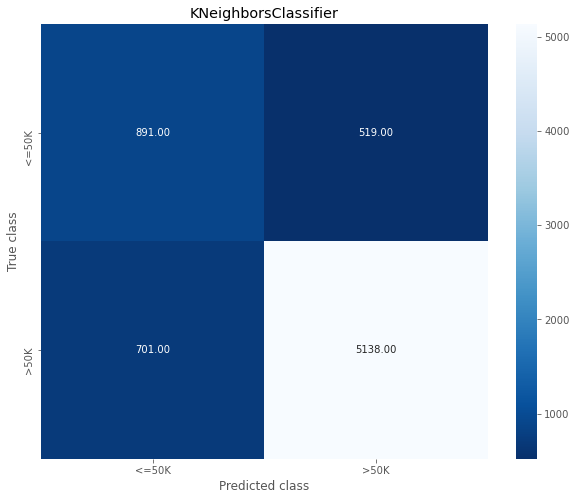

In [86]:
# Finding classification report of knn
print(classification_report(y_test, y_pred))

# finding confusion matrix
cfm = metrics.confusion_matrix(y_pred, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["<=50K", ">50K"] , yticklabels = ["<=50K", ">50K"] ,cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('KNeighborsClassifier')

#### After modelling KNeighborsClassifier then my next step is to find Roc Score which will help me to make Roc_Auc Curve.¶
Below is the Roc Score:

In [87]:
# KNN AUC score
roc_auc_score(y_test,knn.predict(x_test))

0.7339643129026784

#### In prediction KNeighborsClassifier with Income:
###### I had done this prediction by taking Income as an output variable which is Classification in nature.
###### While calculating the best random state the 370 is best state which providing the highest accuracy value for this model.
###### After calculating confusion matrix and classification report of KNeighborsClassifier - 83%.
###### Therefore i use hypertuning method by using Grid Search Cv to improve my Accuracy Score and this gives a no increasing value of KNeighborsClassifier - 83%¶
###### Then I found roc_auc_score of KNeighborsClassifier which is 73.39%.

# RandomForestClassifier

#### A random forest classifier. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
#### It works in four steps:
#### Select random samples from a given dataset.
#### Construct a decision tree for each sample and get a prediction result from each decision tree.¶
#### Perform a vote for each predicted result.
#### Select the prediction result with the most votes as the final prediction.

In [88]:
rfc = RandomForestClassifier()

rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

#### First I have to fit the Training data of RandomForestClassifier.

In [89]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[5263,  394],
       [ 663,  929]], dtype=int64)

In [90]:
rfc.score(x_test,y_test)

0.8541867843840529

In [91]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      5657
           1       0.70      0.58      0.64      1592

    accuracy                           0.85      7249
   macro avg       0.80      0.76      0.77      7249
weighted avg       0.85      0.85      0.85      7249



#### According to my perception of modelling RandomForestClassifier I got Accuracy Score : 85%.
#### But this score can improve the accuracy by using Grid Search CV.

# Let use Grid search CV  to improve the accuracy

In [92]:
params = {'n_estimators':[13,15],
         'criterion':['entropy'],
         'max_depth':[10],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]
         }

grd = GridSearchCV(rfc,param_grid=params)
grd.fit(x_train,y_train)
print(grd.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 11, 'n_estimators': 15}


In [93]:
rfc = grd.best_estimator_

In [94]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=6,
                       min_samples_split=11, n_estimators=15)

In [95]:
y_pred = rfc.predict(x_test)

In [96]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[5409,  248],
       [ 824,  768]], dtype=int64)

In [97]:
rfc.score(x_test,y_test)

0.8521175334528901

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      5657
           1       0.76      0.48      0.59      1592

    accuracy                           0.85      7249
   macro avg       0.81      0.72      0.75      7249
weighted avg       0.84      0.85      0.84      7249



Text(0.5, 1.0, 'RandomForestClassifier')

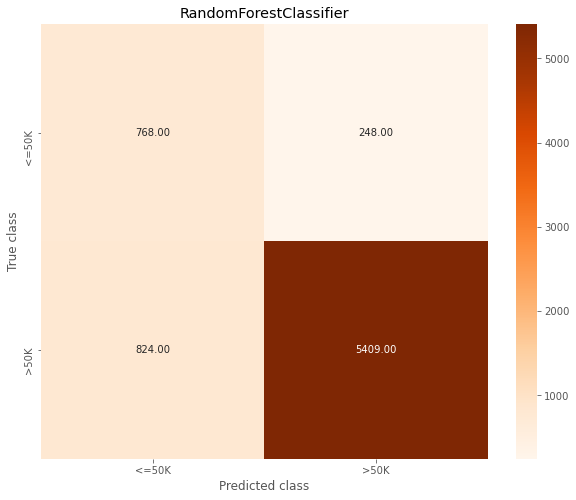

In [98]:
# Finding classification report of RandomForestClassifier
print(classification_report(y_test, y_pred))

# finding confusion matrix
cfm = metrics.confusion_matrix(y_pred, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["<=50K", ">50K"] , yticklabels = ["<=50K", ">50K"] ,cmap ="Oranges")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('RandomForestClassifier')

#### After modelling RandomForestClassifier then my next step is to find Roc Score which will help me to make Roc_Auc Curve.
#### Below is the Roc Score:

In [99]:
# Random forest  
roc_auc_score(y_test,rfc.predict(x_test))

0.7192862847026363

#### In prediction RandomForestClassifier with Income:
###### I had done this prediction by taking Loan_Status as an output variable which is Classification in nature.
###### While calculating the best random state the 370 is best state which providing the highest accuracy value for this model.
###### After calculating confusion matrix and classification report of RandomForestClassifier - 85%.
###### Therefore i use hypertuning method by using Grid Search Cv to improve my Accuracy Score and this gives a no increasing value of RandomForestClassifier - 85%¶
###### Then I found roc_auc_score of RandomForestClassifier which is 71.92%.

# Decision Tree Classifier

#### Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.
#### The tree's branches contain the logic for a decision rule, meaning your data is continually split given the input features. The decision tree classifier is commonly used for image classification, decision analysis, strategy analysis, in medicine for diagnosis, in psychology for behavioral thinking analysis, and more.¶

In [100]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)

##### First I have to fit the Training data of Decision Tree Classifier.

In [102]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[5320,  337],
       [ 868,  724]], dtype=int64)

In [103]:
dtc.score(x_test,y_test)

0.8041109118499103

In [104]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      5657
           1       0.68      0.45      0.55      1592

    accuracy                           0.83      7249
   macro avg       0.77      0.70      0.72      7249
weighted avg       0.82      0.83      0.82      7249



#### According to my perception of modelling Decision Tree Classifier I got Accuracy Score : 83%.
#### But this score can improve the accuracy by using Grid Search CV.

# Let use Grid search CV  to improve the accuracy

In [106]:
grid_param = {'criterion':['gini','entropy'],
             'max_depth':range(2,10,3),
             'min_samples_leaf':range(1,10,2),
             'min_samples_split':range(2,10,2)
             }

In [107]:
grid_search = GridSearchCV(estimator=dtc,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs=1)

In [108]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 3),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [109]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 2}


In [110]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=9,min_samples_split=6)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=9, min_samples_split=6)

In [111]:
y_pred = dtc.predict(x_test)

In [112]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[5409,  248],
       [ 833,  759]], dtype=int64)

In [113]:
dtc.score(x_test,y_test)

0.8508759828941923

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      5657
           1       0.75      0.48      0.58      1592

    accuracy                           0.85      7249
   macro avg       0.81      0.72      0.75      7249
weighted avg       0.84      0.85      0.84      7249



Text(0.5, 1.0, 'DecisionTreeClassifier')

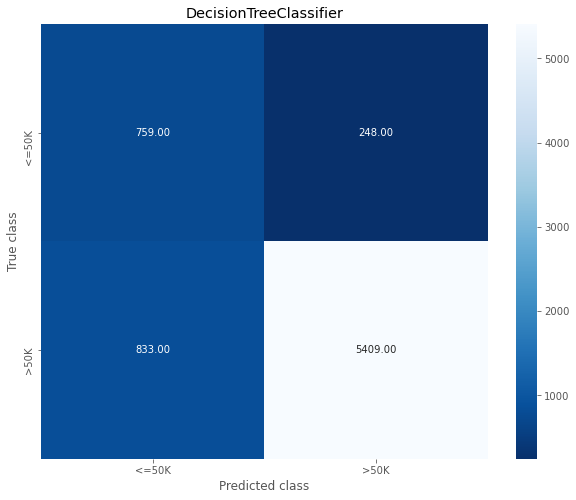

In [114]:
# Finding classification report of DecisionTreeClassifier
print(classification_report(y_test, y_pred))

# finding confusion matrix
cfm = metrics.confusion_matrix(y_pred, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["<=50K", ">50K"] , yticklabels = ["<=50K", ">50K"] ,cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('DecisionTreeClassifier')

#### By using Grid Search CV I improve the Accuracy Score : 85%
#### After modelling Decision Tree Classifier then my next step is to find Roc Score which will help me to make Roc_Auc Curve.
#### Below is the Roc Score:

In [115]:
# Decision Tree Classifier AUC score
roc_auc_score(y_test,dtc.predict(x_test))

0.7164596515368072

### In prediction Decision Tree Classifier with Income:
##### I had done this prediction by taking Income as an output variable which is Classification in nature.
##### While calculating the best random state the 370 is best state which providing the highest accuracy value for this model.
##### After calculating confusion matrix and classification report of Decision Tree Classifier - 83%.
##### herefore i use hypertuning method by using Grid Search Cv to improve my Accuracy Score and this gives a increasing value of Decision Tree Classifier - 85%
##### Then I found roc_auc_score of Decision Tree Classifie which is 71.64%.

# XGBoost Model

### XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework.
### XGBoost is a popular and efficient open-source implementation of the gradient boosted trees algorithm. Gradient boosting is a supervised learning algorithm, which attempts to accurately predict a target variable by combining the estimates of a set of simpler, weaker models.

In [118]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

[13:35:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### First I have to fit the Training data of XGBoost Model.

In [119]:
# checking training accuracy

y_pred = xgb.predict(x_train)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_train,predictions)
accuracy

0.9076569326281904

In [120]:
# checking initial test accuracy

y_pred = xgb.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test,predictions)
accuracy

0.8638432887294799

In [121]:
x_test

array([[-1.05783559, -0.18079177, -1.62860199, ..., -0.03706216,
        -1.78437983,  0.21703764],
       [-0.83366107, -0.18079177,  0.25005825, ..., -0.03706216,
         0.00916132,  0.21703764],
       [-0.16113752, -0.18079177,  0.35362938, ..., -0.03706216,
         0.00916132,  0.21703764],
       ...,
       [-0.01168784, -0.18079177, -1.61861097, ..., -0.03706216,
         0.00916132,  0.21703764],
       [ 0.21248668,  1.89068677,  0.71701983, ..., -0.03706216,
         0.00916132,  0.21703764],
       [ 0.66083572, -0.18079177,  0.34273104, ..., -0.03706216,
         0.45754661, -0.53532836]])

In [122]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      5657
           1       0.73      0.61      0.66      1592

    accuracy                           0.86      7249
   macro avg       0.81      0.77      0.79      7249
weighted avg       0.86      0.86      0.86      7249



##### According to my perception of modelling XGBoost Model I got Accuracy Score : 86%.
##### But this score can improve the accuracy by using Grid Search CV.

# Let use Grid search CV for the best parameter to improve the accuracy

In [123]:
param_grid = {'learning_rate':[1,0.5,0.1,0.01,0.001],
             'max_depth':[3,5,10,20],
             'n_estimators':[10,50,100,200]
             }

In [124]:
grid = GridSearchCV(XGBClassifier(),param_grid,verbose=3)

In [125]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[13:36:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.857 total time=   0.1s
[13:36:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.855 total time=   0.1s
[13:36:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the d

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [126]:
# to find best parameters giving maximum accuracy

grid.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [127]:
xgb = XGBClassifier(learning_rate='1',max_depth=3,n_estimators=10)
xgb.fit(x_train,y_train)

[13:58:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate='1', max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [128]:
y_pred = xgb.predict(x_test)

In [129]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[5354,  303],
       [ 715,  877]], dtype=int64)

In [130]:
xgb.score(x_test,y_test)

0.8595668368050766

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      5657
           1       0.74      0.55      0.63      1592

    accuracy                           0.86      7249
   macro avg       0.81      0.75      0.77      7249
weighted avg       0.85      0.86      0.85      7249



Text(0.5, 1.0, 'XGBClassifier')

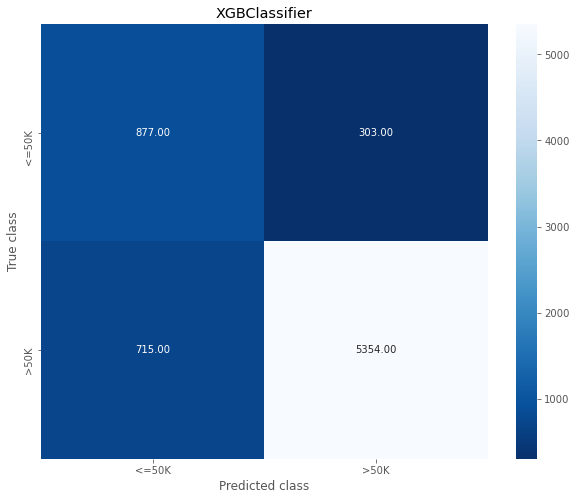

In [131]:
# Finding classification report
print(classification_report(y_test, y_pred))

# finding confusion matrix
cfm = metrics.confusion_matrix(y_pred, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["<=50K", ">50K"] , yticklabels = ["<=50K", ">50K"] ,cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('XGBClassifier')

#### By using Grid Search CV I improve the Accuracy Score : 86%
#### After modelling XGBClassifier then my next step is to find Roc Score which will help me to make Roc_Auc Curve.¶¶
Below is the Roc Score:

In [132]:
# XGBClassifier 
roc_auc_score(y_test,xgb.predict(x_test))

0.7486587191748028

### In prediction XGBClassifier with Income:
###### I had done this prediction by taking Income as an output variable which is Classification in nature.
###### While calculating the best random state the 370 is best state which providing the highest accuracy value for this model.
###### After calculating confusion matrix and classification report of XGBClassifier - 86%.
###### Therefore i use hypertuning method by using Grid Search Cv to improve my Accuracy Score and this gives a no increasing value of XGBClassifier - 86%
###### Then I found roc_auc_score of XGBClassifier which is 74.86%.

# AdaBoostClassifier

#### AdaBoost can be used to boost the performance of any machine learning algorithm. It is best used with weak learners. These are models that achieve accuracy just above random chance on a classification problem. The most suited and therefore most common algorithm used with AdaBoost are decision trees with one level.

In [133]:
ada = AdaBoostClassifier()

In [134]:
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)

##### First I have to fit the Training data of AdaBoostClassifier.

In [135]:
#accuracy_score before tuning
print(accuracy_score(y_test,y_pred))

0.8517036832666575


# Hyperparameter tuning for AdaBoost using GridSearchCV

In [137]:
params = {'n_estimators':[40,42,44,45],'learning_rate':[0.20,0.22,0.234567]}

In [138]:
grd_ada = GridSearchCV(AdaBoostClassifier(),param_grid = params)

In [139]:
grd_ada.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.2, 0.22, 0.234567],
                         'n_estimators': [40, 42, 44, 45]})

In [140]:
grd_ada.best_estimator_

AdaBoostClassifier(learning_rate=0.234567, n_estimators=45)

In [141]:
ada = AdaBoostClassifier(learning_rate = 0.2434567,n_estimators = 44)

In [142]:
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)

In [143]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[5424,  233],
       [ 850,  742]], dtype=int64)

In [144]:
ada.score(x_test,y_test)

0.8506000827700373

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      5657
           1       0.76      0.47      0.58      1592

    accuracy                           0.85      7249
   macro avg       0.81      0.71      0.74      7249
weighted avg       0.84      0.85      0.84      7249



Text(0.5, 1.0, 'AdaBoostClassifier')

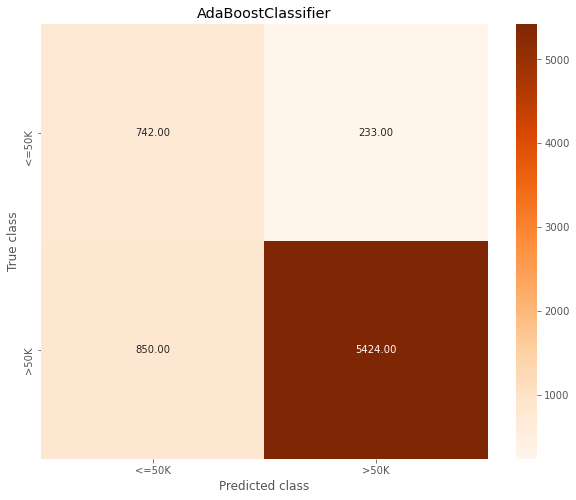

In [145]:
# Finding classification report
print(classification_report(y_test, y_pred))

# finding confusion matrix
cfm = metrics.confusion_matrix(y_pred, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["<=50K", ">50K"] , yticklabels = ["<=50K", ">50K"] ,cmap = "Oranges")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('AdaBoostClassifier')

In [146]:
# AdaBoostClassifier 
roc_auc_score(y_test,ada.predict(x_test))

0.7124462466122373

### In prediction AdaBoostClassifier with Income:
#### I had done this prediction by taking Income as an output variable which is Classification in nature.
#### While calculating the best random state the 370 is best state which providing the highest accuracy value for this model.
#### After calculating confusion matrix and classification report of AdaBoostClassifier - 85.17%.
#### Therefore i use hypertuning method by using Grid Search Cv to improve my Accuracy Score and this gives a decreasing value of AdaBoostClassifier - 85%
#### Then I found roc_auc_score of AdaBoostClassifier which is 71.24%.

# Roc Curve

### In Machine Learning, performance measurement is an essential task.¶
##### So when it comes to a classification problem, I can count on an AUC - ROC Curve.
##### When I need to check or visualize the performance of the multi-class classification problem, I use the AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve.
##### It is one of the most important evaluation metrics for checking any classification model’s performance. It is also written as AUROC (Area Under the Receiver Operating Characteristics)

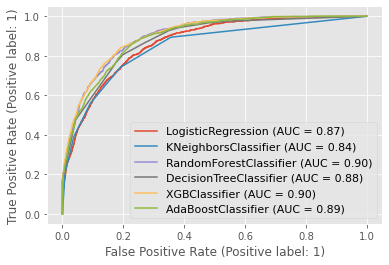

In [147]:
disp = plot_roc_curve(log_reg,x_test,y_test)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dtc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ada,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

#### The area under the ROC curve represents the ability of our model to predict correct values, and the curve that we got is quite a good score.

# Saving the Best Model

In [148]:
import pickle

In [149]:
# saving the XGB Classifier

filename = 'finalized_model.pickle'
pickle.dump(xgb,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))

#### From the Above Coding I Get best model XGB Classifier Model Accuracy Score.
#### So I use XGB Classifier Model to Save the Best Model.

# Conclusion

### I’ll briefly discuss how I approached this problem of predicting Census Income prediction.
### a) I have Census Income Prdiction datastet from which I had to extract information.
### b ) I had used pandas library to read the Dataset which provide me to explore & viualize the Data properly based on Rows & Columns.
### c) After from all datasets, I preprocessed the data using imputer function to fill the missing values and replacing all zeros.
### d) I did exploratory data analysis on main data frame and tried to remove all the possible outliers.
### e) Based on visulization knowledge, I use various EDA TECHNIQUES to plot the graphs and Z - SCORE.
### f) I use VIF and Standard Scalar to scaled the data and by VIF I make a relationship between Features & Features.
### g) After from all these i split the Features & Labels into 2 parts.
### h) On this data, I have applied our machine learning models such as logistic regression, Random forest,Decision Tree,ADABoost Classifier, XGBoost Classifier and KNN.
### In the modeling Building section, we have seen the hyperparameter tuned XGBClassifer has the highest Best Score (0.86).
### It can be clearly seen the feature engineering effects on each individual nine model in 'Comparison of ML Classifiers with Effects of Future Engineering' Roc Curve chart above.
